# IS53051A/IS71071B: MACHINE LEARNING

# **Machine Learning Assignment: Fever Prediction using Infrared Thermography Data**

## **Objective**
Develop a Machine Learning (ML) application using the **Infrared Thermography Temperature Dataset** to predict **oral temperature readings** and detect **fever presence** based on sensor-collected thermal imaging data.

---

## **Tasks Overview**
### 1. **Regression Task** (Predict Oral Temperature)
   - Predict **oral temperature (aveOralF and aveOralM)**
   - Use **environmental and sensor readings** as input

### 2. **Classification Task** (Predict Fever Status)
   - Fever is defined as **oral temperature ≥ 37.5°C**
   - Train models to classify fever presence based on both **aveOralF and aveOralM**

---

## **Step-by-Step Approach**

### **1. Data Exploration & Preprocessing**
- Load the dataset using `pandas`
- Check for **missing values, data types, distributions**
- Perform **visualizations** (histograms, scatter plots, correlation matrices)
- Handle missing values (imputation or removal)
- Normalize/standardize numerical features if necessary
- Encode categorical features (e.g., one-hot encoding for gender, ethnicity)

---

### **2. Regression Models (Predicting aveOralF & aveOralM)**
- **Baseline Model:** Linear Regression
- **Advanced Models:**  
  - Polynomial Regression  
  - Random Forest Regressor  
  - XGBoost (mandatory for MSc students)  
  - Neural Networks (optional)
- **Model Evaluation Metrics:**  
  - Mean Absolute Error (MAE)  
  - Mean Squared Error (MSE)  
  - R-squared (R²)

---

### **3. Classification Models (Predicting Fever)**
- Convert **oral temperature to fever status (binary classification)**:
  - Fever = **1** if `aveOralF ≥ 37.5°C` or `aveOralM ≥ 37.5°C`
  - No fever = **0** otherwise
- **Train Classification Models:**
  - Logistic Regression
  - Random Forest Classifier
  - XGBoost Classifier (for MSc students)
  - Neural Networks (optional)
- **Evaluation Metrics:**  
  - Accuracy  
  - Precision & Recall  
  - F1-score  
  - ROC-AUC & PR-AUC (Precision-Recall Curve)
- **Threshold Optimization:** Adjust classification thresholds beyond the default 50% for better precision/recall balance

---

### **4. Model Optimization & Feature Analysis**
- Use **GridSearchCV** or **RandomizedSearchCV** for hyperparameter tuning
- Perform **Feature Importance Analysis** to determine most influential variables
- Evaluate **different classification thresholds** for improved fever detection

---

### **5. Discussion & Interpretation of Results**
- **Which features were most important?**
- **How did different models compare?**
- **Generalization performance of models**
- **Implications of false positives vs. false negatives**
- **Future improvements & limitations**

---

## **Deliverable: Jupyter Notebook**
Your notebook should include:
✅ **Data loading & exploration**  
✅ **Preprocessing & feature engineering**  
✅ **Regression & classification model training**  
✅ **Model tuning & evaluation**  
✅ **Visualizations & feature importance analysis**  
✅ **Conclusion summarizing key findings**

---

## **Final Notes**
- **MSc students must implement XGBoost**
- **Compare multiple models, not just one**
- **Optimize the classification threshold, don't rely only on 50%**
- **Include discussions on feature importance & interpretability**
- **Use cross-validation to improve model reliability**

---

## **Summary**
This project requires you to develop an ML model that predicts **oral temperature** and classifies **fever status** using thermal sensor data. You must apply **data preprocessing, regression, classification, hyperparameter tuning, and feature analysis** while providing a **well-documented Jupyter Notebook**.

---


# 1. Importing, Cleaning and Creating a Train and Test Split

## 1.1 Read the data

In [264]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import json
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve, PrecisionRecallDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC


In [265]:

pd.set_option("display.max_columns", None)
csv_filename = "infrared_thermography_temperature.csv"

# Check if the CSV file already exists
if os.path.exists(csv_filename):
    df = pd.read_csv(csv_filename)
else:
    from ucimlrepo import fetch_ucirepo 
    infrared_thermography_temperature = fetch_ucirepo(id=925)

    X = infrared_thermography_temperature.data.features
    Y = infrared_thermography_temperature.data.targets
    METADATA = infrared_thermography_temperature.metadata
    VARIABLES = infrared_thermography_temperature.variables
    df = pd.concat([X, Y], axis=1)
    df.to_csv(csv_filename, index=False)
    with open("metadata.txt", "w") as f:
        json.dump(METADATA, f, indent=4)

    VARIABLES.to_csv("variables.csv", index=False)
raw_data = df
display(raw_data.head())


,Gender,Age,Ethnicity,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,aveAllL13_1,T_RC1,T_RC_Dry1,T_RC_Wet1,T_RC_Max1,T_LC1,T_LC_Dry1,T_LC_Wet1,T_LC_Max1,RCC1,LCC1,canthiMax1,canthi4Max1,T_FHCC1,T_FHRC1,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1,aveOralF,aveOralM
0,Male,41-50,White,24.0,28.0,0.8,0.7025,35.0300,35.3775,34.4000,34.9175,34.9850,34.9850,34.7625,35.0325,35.3375,35.3375,34.4850,35.3775,34.7850,34.4650,35.3775,35.3375,33.5775,33.4775,33.3725,33.4925,33.0025,34.5300,34.0075,35.6925,35.6350,35.6525,36.85,36.59
1,Female,31-40,Black or African-American,24.0,26.0,0.8,0.7800,34.5500,34.5200,33.9300,34.2250,34.7100,34.6325,34.6400,34.7425,34.5600,34.5375,34.3500,34.5750,34.3225,34.2400,34.7400,34.7150,34.0325,34.0550,33.6775,33.9700,34.0025,34.6825,34.6600,35.1750,35.0925,35.1075,37.00,37.19
2,Female,21-30,White,24.0,26.0,0.8,0.8625,35.6525,35.5175,34.2775,34.8000,35.6850,35.6675,35.6150,35.7175,35.5025,35.5025,35.2950,35.5300,35.3575,35.0925,35.7175,35.6825,34.9000,34.8275,34.6475,34.8200,34.6700,35.3450,35.2225,35.9125,35.8600,35.8850,37.20,37.34
3,Female,21-30,Black or African-American,24.0,27.0,0.8,0.9300,35.2225,35.6125,34.3850,35.2475,35.2075,35.2000,35.1175,35.2250,35.5950,35.5950,35.3275,35.6125,34.9100,35.1700,35.6125,35.5950,34.4400,34.4225,34.6550,34.3025,34.9175,35.6025,35.3150,35.7200,34.9650,34.9825,36.85,37.09
4,Male,18-20,White,24.0,27.0,0.8,0.8950,35.5450,35.6650,34.9100,35.3675,35.6025,35.4750,35.5700,35.6400,35.6400,35.6400,35.0775,35.6675,35.3550,35.1200,35.6650,35.6475,35.0900,35.1600,34.3975,34.6700,33.8275,35.4175,35.3725,35.8950,35.5875,35.6175,36.80,37.04


## 1.2 Generalised Data Overview

### 1.2.1 Giving the columns friendly names

In [266]:
column_mapping = {
    "Gender": "Gender",
    "Age": "Age",
    "Ethnicity": "Ethnicity",
    "T_atm": "Ambient_Temperature",
    "Humidity": "Ambient_Humidity",
    "Distance": "Measurement_Distance",
    "T_offset1": "Temperature_Offset",
    "Max1R13_1": "Max_Temp_Right_Eye_Region",
    "Max1L13_1": "Max_Temp_Left_Eye_Region",
    "aveAllR13_1": "Avg_Temp_Right_Eye_Region",
    "aveAllL13_1": "Avg_Temp_Left_Eye_Region",
    "T_RC1": "Temperature_Right_Canthus",
    "T_RC_Dry1": "Temperature_Right_Canthus_Dry",
    "T_RC_Wet1": "Temperature_Right_Canthus_Wet",
    "T_RC_Max1": "Max_Temperature_Right_Canthus",
    "T_LC1": "Temperature_Left_Canthus",
    "T_LC_Dry1": "Temperature_Left_Canthus_Dry",
    "T_LC_Wet1": "Temperature_Left_Canthus_Wet",
    "T_LC_Max1": "Max_Temperature_Left_Canthus",
    "RCC1": "Right_Canthus_Center_Temperature",
    "LCC1": "Left_Canthus_Center_Temperature",
    "canthiMax1": "Max_Temperature_Canthi",
    "canthi4Max1": "Max_Temperature_Canthi_4Regions",
    "T_FHCC1": "Temperature_Forehead_Central",
    "T_FHRC1": "Temperature_Forehead_Right",
    "T_FHLC1": "Temperature_Forehead_Left",
    "T_FHBC1": "Temperature_Forehead_Bottom",
    "T_FHTC1": "Temperature_Forehead_Top",
    "T_FH_Max1": "Max_Temperature_Forehead",
    "T_FHC_Max1": "Max_Temperature_Forehead_Central",
    "T_Max1": "Max_Temperature_Overall",
    "T_OR1": "Oral_Temperature_Reading",
    "T_OR_Max1": "Max_Oral_Temperature",
    "aveOralF": "Avg_Oral_Temperature_Fast",
    "aveOralM": "Avg_Oral_Temperature_Monitor"
}

raw_data.rename(columns=column_mapping, inplace=True)

Text(0.5, 0.98, 'Distribution of Raw Data')

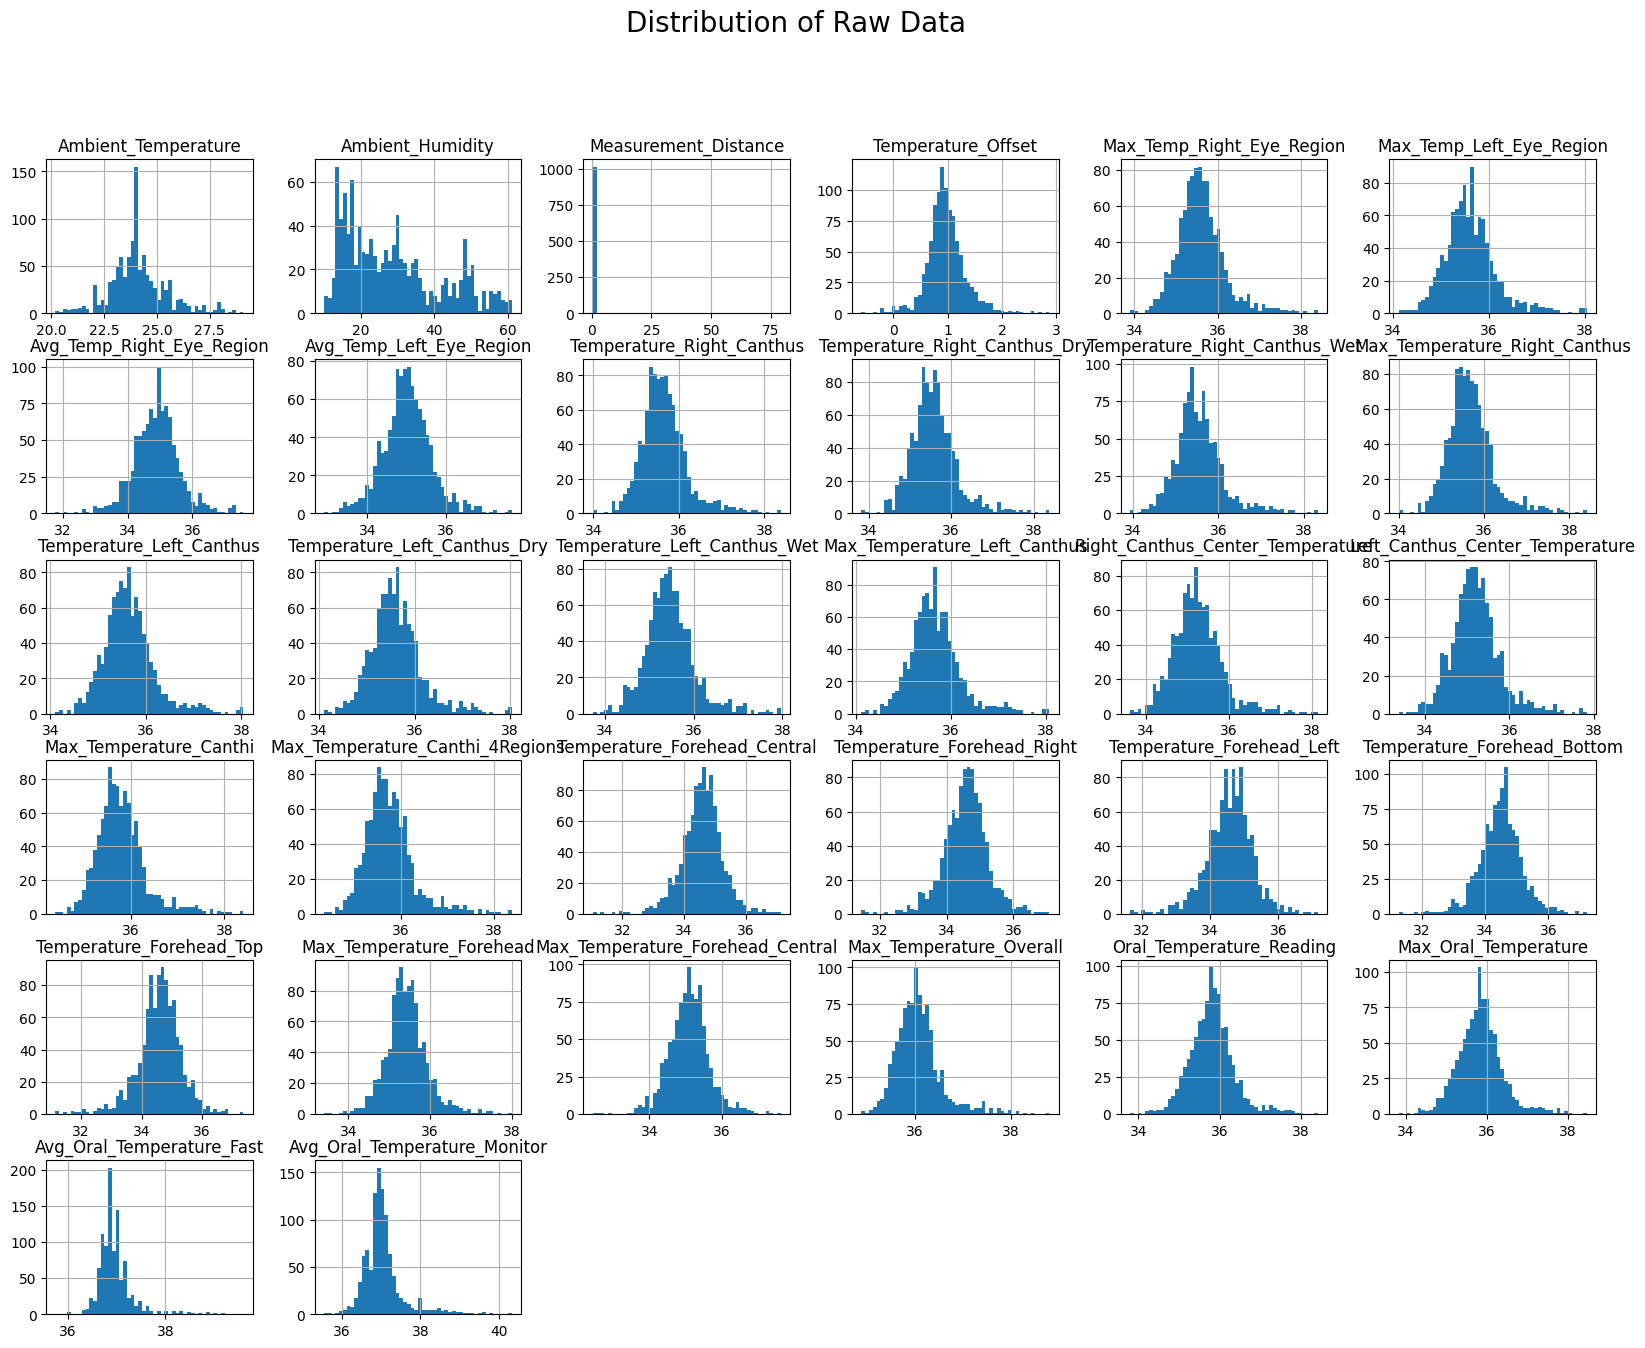

In [267]:
raw_data.hist(bins=50, figsize=(20,15))
plt.suptitle("Distribution of Raw Data", fontsize=20)

### 1.2.2 Data in detail

#### 1.2.2.1 Distance Outlier

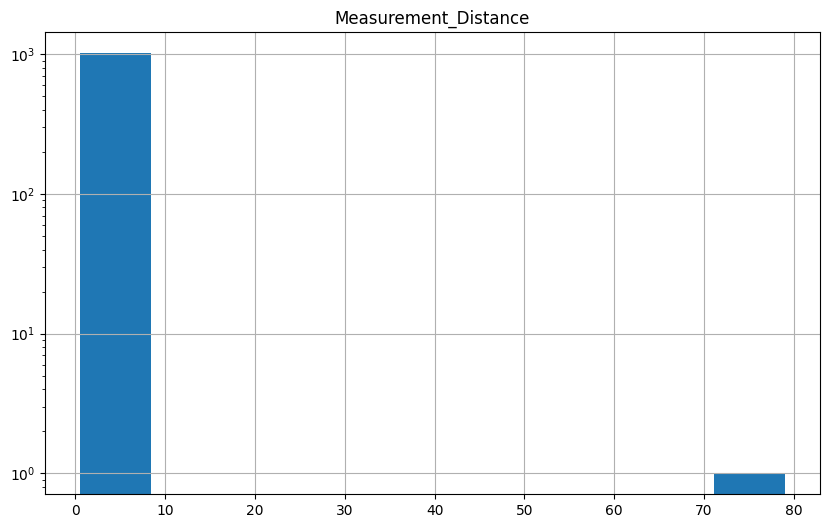

,Measurement_Distance
97,79.0


In [268]:
plt.figure(figsize=(10, 6))
raw_data["Measurement_Distance"].hist()
plt.yscale("log")  # Log to display the potential outlier
plt.title("Measurement_Distance")
plt.show()
pd.DataFrame(raw_data["Measurement_Distance"][raw_data["Measurement_Distance"] > 10])

This single distance of `79.0` I would consider an outlier, this will be removed.

In [269]:
raw_data.drop(index=97, inplace=True)
pd.DataFrame(raw_data["Measurement_Distance"][raw_data["Measurement_Distance"] > 10])

,Measurement_Distance


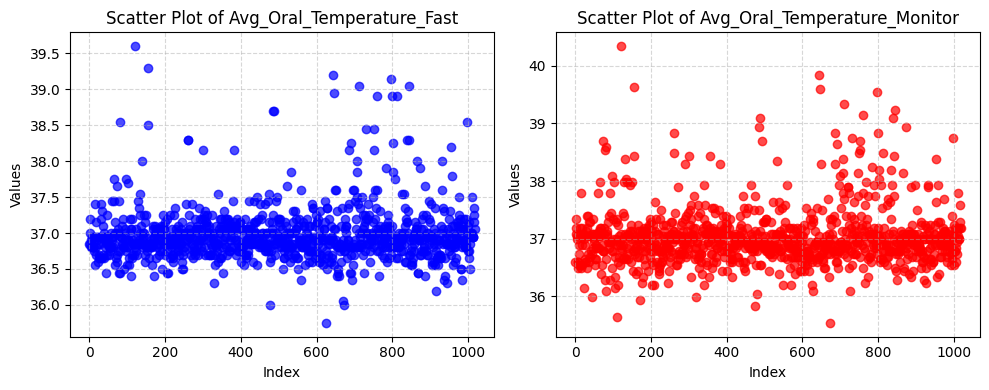

In [270]:
# get all values for each point (index)
x_f = np.arange(len(raw_data["Avg_Oral_Temperature_Fast"]))
x_m = np.arange(len(raw_data["Avg_Oral_Temperature_Monitor"]))

fig, ax = plt.subplots(1, 2,figsize=(10, 4))
ax[0].scatter(x_f, raw_data["Avg_Oral_Temperature_Fast"], alpha=0.7, color='b')
ax[0].set_title("Scatter Plot of Avg_Oral_Temperature_Fast")
ax[0].set_xlabel("Index")
ax[0].set_ylabel("Values")
ax[0].grid(True, linestyle="--", alpha=0.5)

ax[1].scatter(x_m, raw_data["Avg_Oral_Temperature_Monitor"], alpha=0.7, color='r')
ax[1].set_title("Scatter Plot of Avg_Oral_Temperature_Monitor")
ax[1].set_xlabel("Index")
ax[1].set_ylabel("Values")
ax[1].grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

## 1.3 Generic data cleaning

Starting the random number session

In [271]:
np.random.seed(42)

In [272]:
raw_data.head()

,Gender,Age,Ethnicity,Ambient_Temperature,Ambient_Humidity,Measurement_Distance,Temperature_Offset,Max_Temp_Right_Eye_Region,Max_Temp_Left_Eye_Region,Avg_Temp_Right_Eye_Region,Avg_Temp_Left_Eye_Region,Temperature_Right_Canthus,Temperature_Right_Canthus_Dry,Temperature_Right_Canthus_Wet,Max_Temperature_Right_Canthus,Temperature_Left_Canthus,Temperature_Left_Canthus_Dry,Temperature_Left_Canthus_Wet,Max_Temperature_Left_Canthus,Right_Canthus_Center_Temperature,Left_Canthus_Center_Temperature,Max_Temperature_Canthi,Max_Temperature_Canthi_4Regions,Temperature_Forehead_Central,Temperature_Forehead_Right,Temperature_Forehead_Left,Temperature_Forehead_Bottom,Temperature_Forehead_Top,Max_Temperature_Forehead,Max_Temperature_Forehead_Central,Max_Temperature_Overall,Oral_Temperature_Reading,Max_Oral_Temperature,Avg_Oral_Temperature_Fast,Avg_Oral_Temperature_Monitor
0,Male,41-50,White,24.0,28.0,0.8,0.7025,35.0300,35.3775,34.4000,34.9175,34.9850,34.9850,34.7625,35.0325,35.3375,35.3375,34.4850,35.3775,34.7850,34.4650,35.3775,35.3375,33.5775,33.4775,33.3725,33.4925,33.0025,34.5300,34.0075,35.6925,35.6350,35.6525,36.85,36.59
1,Female,31-40,Black or African-American,24.0,26.0,0.8,0.7800,34.5500,34.5200,33.9300,34.2250,34.7100,34.6325,34.6400,34.7425,34.5600,34.5375,34.3500,34.5750,34.3225,34.2400,34.7400,34.7150,34.0325,34.0550,33.6775,33.9700,34.0025,34.6825,34.6600,35.1750,35.0925,35.1075,37.00,37.19
2,Female,21-30,White,24.0,26.0,0.8,0.8625,35.6525,35.5175,34.2775,34.8000,35.6850,35.6675,35.6150,35.7175,35.5025,35.5025,35.2950,35.5300,35.3575,35.0925,35.7175,35.6825,34.9000,34.8275,34.6475,34.8200,34.6700,35.3450,35.2225,35.9125,35.8600,35.8850,37.20,37.34
3,Female,21-30,Black or African-American,24.0,27.0,0.8,0.9300,35.2225,35.6125,34.3850,35.2475,35.2075,35.2000,35.1175,35.2250,35.5950,35.5950,35.3275,35.6125,34.9100,35.1700,35.6125,35.5950,34.4400,34.4225,34.6550,34.3025,34.9175,35.6025,35.3150,35.7200,34.9650,34.9825,36.85,37.09
4,Male,18-20,White,24.0,27.0,0.8,0.8950,35.5450,35.6650,34.9100,35.3675,35.6025,35.4750,35.5700,35.6400,35.6400,35.6400,35.0775,35.6675,35.3550,35.1200,35.6650,35.6475,35.0900,35.1600,34.3975,34.6700,33.8275,35.4175,35.3725,35.8950,35.5875,35.6175,36.80,37.04


### 1.3.1 Checking for duplicate data

In [273]:
raw_data.duplicated().sum()

np.int64(0)

### 1.4 Test Train Split

In [274]:
# Example for comparison
# First, split the data into train and test sets 80,20
train_set, test_set = train_test_split(raw_data, test_size=0.2, random_state=42)
# 50/50
train_set, val_set = train_test_split(train_set, test_size=0.25, random_state=42) 
# used later
rand_split_train_cats = train_set
print(f"Training set size: {len(train_set)}")
print(f"Validation set size: {len(val_set)}")
print(f"Test set size: {len(test_set)}")
display(train_set.info())
display(val_set.info())


Training set size: 611
Validation set size: 204
Test set size: 204
<class 'pandas.core.frame.DataFrame'>
Index: 611 entries, 1001 to 873
Data columns (total 35 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Gender                            611 non-null    object 
 1   Age                               611 non-null    object 
 2   Ethnicity                         611 non-null    object 
 3   Ambient_Temperature               611 non-null    float64
 4   Ambient_Humidity                  611 non-null    float64
 5   Measurement_Distance              610 non-null    float64
 6   Temperature_Offset                611 non-null    float64
 7   Max_Temp_Right_Eye_Region         611 non-null    float64
 8   Max_Temp_Left_Eye_Region          611 non-null    float64
 9   Avg_Temp_Right_Eye_Region         611 non-null    float64
 10  Avg_Temp_Left_Eye_Region          611 non-null    float64
 11  Temper

None

<class 'pandas.core.frame.DataFrame'>
Index: 204 entries, 239 to 28
Data columns (total 35 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Gender                            204 non-null    object 
 1   Age                               204 non-null    object 
 2   Ethnicity                         204 non-null    object 
 3   Ambient_Temperature               204 non-null    float64
 4   Ambient_Humidity                  204 non-null    float64
 5   Measurement_Distance              203 non-null    float64
 6   Temperature_Offset                204 non-null    float64
 7   Max_Temp_Right_Eye_Region         204 non-null    float64
 8   Max_Temp_Left_Eye_Region          204 non-null    float64
 9   Avg_Temp_Right_Eye_Region         204 non-null    float64
 10  Avg_Temp_Left_Eye_Region          204 non-null    float64
 11  Temperature_Right_Canthus         204 non-null    float64
 12  Temperature_

None

### 1.4.1 Issues with a simple random split

In [275]:
# Automatically detect categorical columns
cat_columns = train_set.select_dtypes(include=['object', 'category']).columns.tolist()

# Dictionary to store missing categories
missing_in_val_from_test = {}
missing_in_val_from_train = {}

for col in cat_columns:
    train_cats = set(train_set[col].dropna().unique())  # Categories in training set
    val_cats = set(val_set[col].dropna().unique())      # Categories in validation set
    test_cats = set(test_set[col].dropna().unique())    # Categories in test set

    # Categories present in test but missing in validation
    missing_test = test_cats - val_cats
    if missing_test:
        missing_in_val_from_test[col] = missing_test

    # Categories present in train but missing in validation
    missing_train = train_cats - val_cats
    if missing_train:
        missing_in_val_from_train[col] = missing_train

# Print results
if missing_in_val_from_test:
    print("Categories in test set but missing in validation set:")
    for col, missing in missing_in_val_from_test.items():
        print(f"{col}: {missing}")

if missing_in_val_from_train:
    print("\nCategories in train set but missing in validation set:")
    for col, missing in missing_in_val_from_train.items():
        print(f"{col}: {missing}")

if not missing_in_val_from_test and not missing_in_val_from_train:
    print("No missing categories detected in validation set.")

Categories in test set but missing in validation set:
Age: {'>60'}
Ethnicity: {'American Indian or Alaskan Native'}

Categories in train set but missing in validation set:
Age: {'>60'}
Ethnicity: {'American Indian or Alaskan Native'}


#### 1.4.1.1 Investigation of Age and Ethinicity 

Age
>60        3
41-50      8
21-30     10
51-60     11
31-40     31
26-30     67
21-25    355
18-20    534
Name: count, dtype: int64

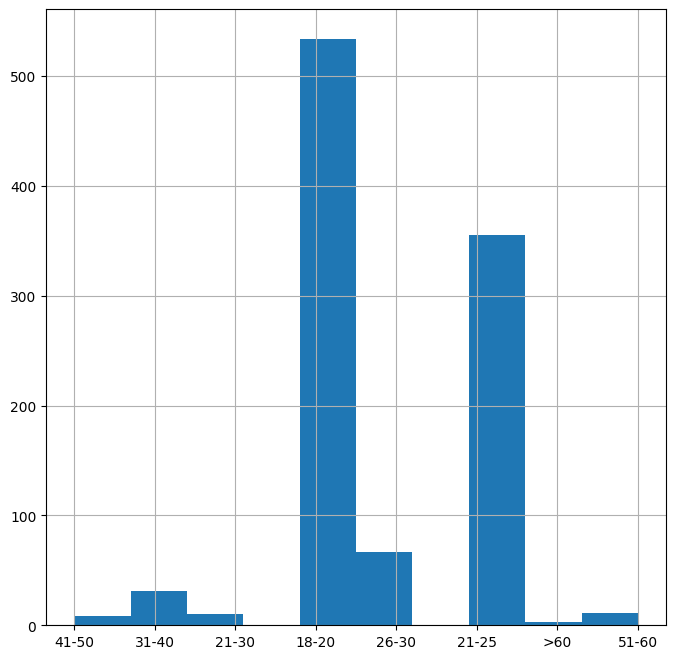

In [276]:
raw_data["Age"].hist(bins=10, figsize=(8, 8))
raw_data["Age"].value_counts().sort_values(ascending=True)

Ethnicity
American Indian or Alaskan Native      4
Multiracial                           50
Hispanic/Latino                       57
Black or African-American            143
Asian                                260
White                                505
Name: count, dtype: int64

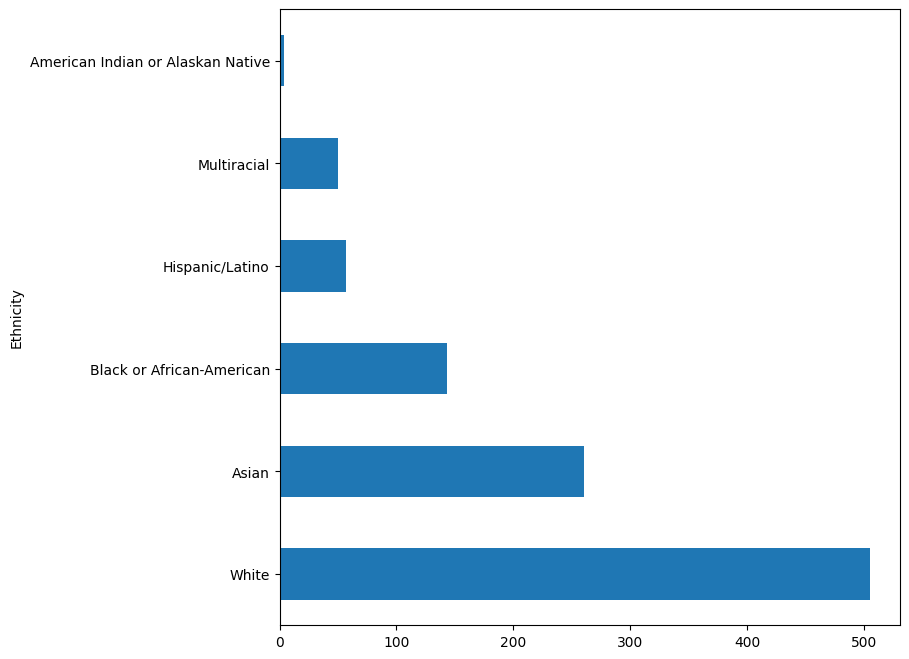

In [277]:
raw_data["Ethnicity"].value_counts().plot(kind="barh", figsize=(8, 8))
raw_data["Ethnicity"].value_counts().sort_values(ascending=True)

##### 1.4.1.1.1 Removal of Ethnicity from Stratification

#### 1.4.2 Identifiying Trends within `Avg_Oral_Temperature_Fast` and `Avg_Oral_Temperature_Monitor`

In [278]:
columns = raw_data[["Avg_Oral_Temperature_Fast", "Avg_Oral_Temperature_Monitor"]]
display(columns.describe())
print(f"Mode:\n{columns.mode().iloc[0]}")

,Avg_Oral_Temperature_Fast,Avg_Oral_Temperature_Monitor
count,1019.000000,1019.000000
mean,36.978999,37.028175
std,0.386531,0.509709
min,35.750000,35.540000
25%,36.800000,36.765000
50%,36.900000,36.940000
75%,37.100000,37.140000
max,39.600000,40.340000


Mode:
Avg_Oral_Temperature_Fast       36.85
Avg_Oral_Temperature_Monitor    36.89
Name: 0, dtype: float64


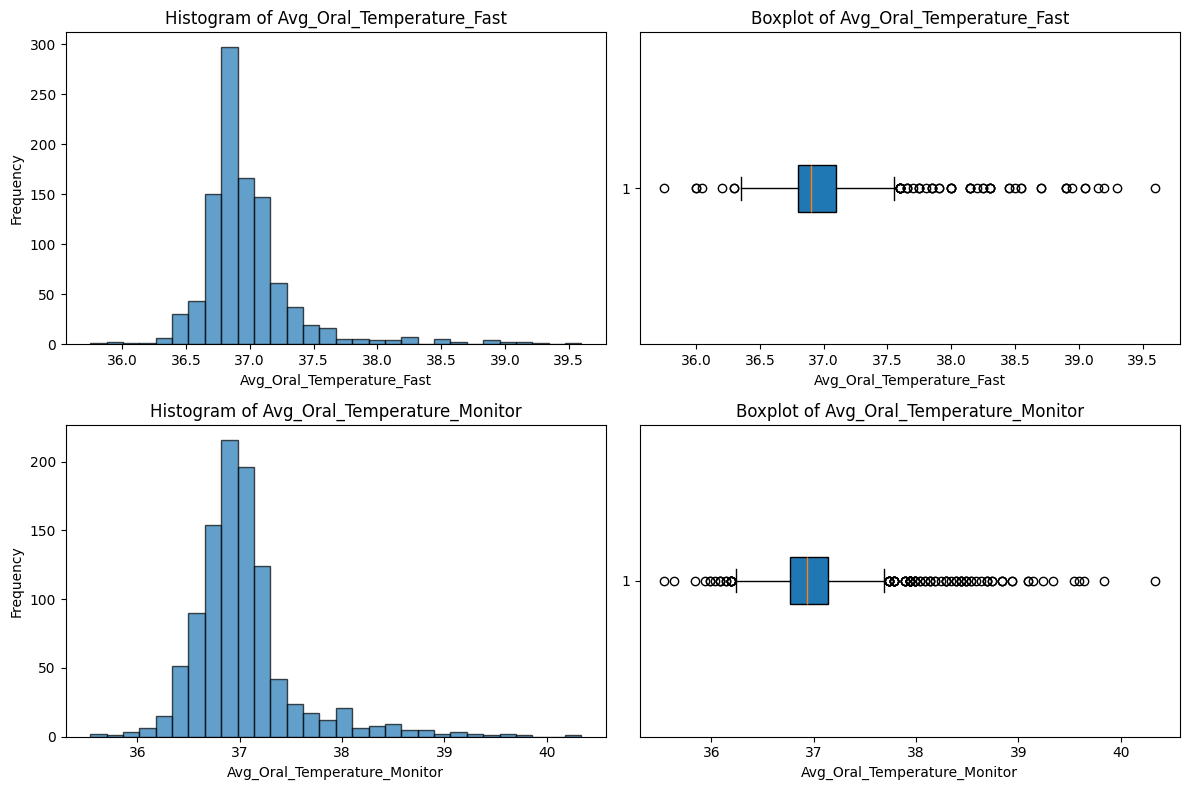

In [279]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

for i, col in enumerate(columns.columns):
    # Histogram
    axes[i, 0].hist(columns[col], bins=30, edgecolor="black", alpha=0.7)
    axes[i, 0].set_title(f"Histogram of {col}")
    axes[i, 0].set_xlabel(col)
    axes[i, 0].set_ylabel("Frequency")

    # Boxplot
    axes[i, 1].boxplot(columns[col].dropna(), vert=False, patch_artist=True)
    axes[i, 1].set_title(f"Boxplot of {col}")
    axes[i, 1].set_xlabel(col)

plt.tight_layout()
plt.show()

### 1.4.3 Introducing Stratified Shuffle Splitting

In [280]:
num_bins = 3 
kbins = KBinsDiscretizer(n_bins=num_bins, encode='ordinal', strategy='quantile')  

raw_data['target1_bin'] = kbins.fit_transform(raw_data[['Avg_Oral_Temperature_Fast']]).astype(int)
raw_data['target2_bin'] = kbins.fit_transform(raw_data[['Avg_Oral_Temperature_Monitor']]).astype(int)

# Create a combined stratification variable
raw_data['stratify_col'] = raw_data['target1_bin'].astype(str) + "_" + raw_data['target2_bin'].astype(str)

display(raw_data['stratify_col'].value_counts())
# Prepare StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform stratified splits if possible
for fold, (train_idx, test_idx) in enumerate(skf.split(raw_data, raw_data['stratify_col'])):
    train_set = raw_data.iloc[train_idx].copy()
    val_set = raw_data.iloc[test_idx].copy()
    
    min_class_size = val_set['stratify_col'].value_counts().min()

    # Only try SSS if class size is larger than 1
    if min_class_size < 2:
        val_set_final, test_set = train_test_split(val_set, test_size=0.5, random_state=42)
    else:
        sss = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=42)
        for val_sub_idx, test_idx in sss.split(val_set, val_set['stratify_col']):
            val_set_final = val_set.iloc[val_sub_idx].copy()
            test_set = val_set.iloc[test_idx].copy()

    train_set = train_set.drop(columns=['target1_bin', 'target2_bin', 'stratify_col'])
    val_set = val_set.drop(columns=['target1_bin', 'target2_bin', 'stratify_col'])
    test_set = test_set.drop(columns=['target1_bin', 'target2_bin', 'stratify_col'])


stratify_col
2_2    278
0_0    226
1_1    147
2_1    113
0_1     88
1_0     87
1_2     57
0_2     14
2_0      9
Name: count, dtype: int64

In [281]:
print(train_set.shape)
print(val_set.shape)
print(test_set.shape)

(816, 35)
(203, 35)
(102, 35)


### 1.4.4 Comparison of dataset splitting 

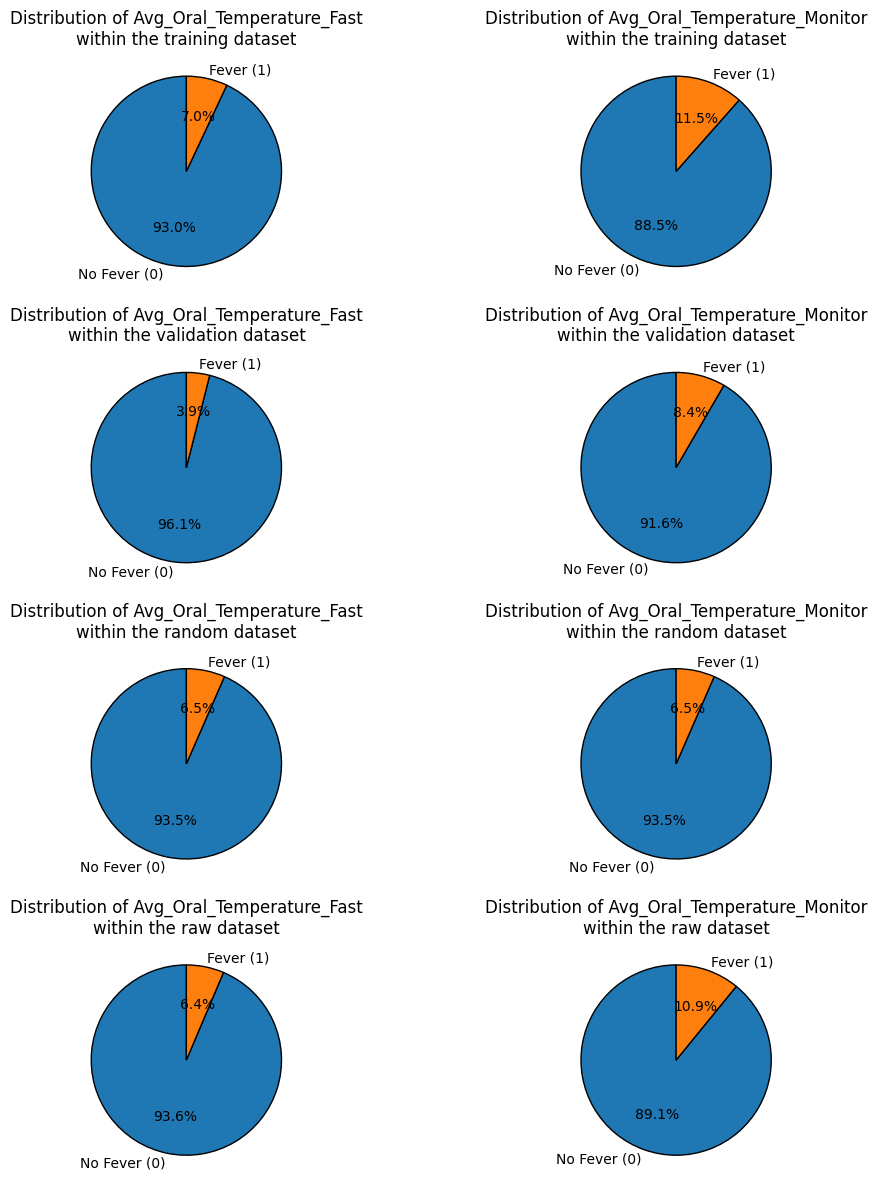

In [282]:
train_set_fast_lables_counted = (train_set["Avg_Oral_Temperature_Fast"] >= 37.5).astype(int).value_counts()
train_set_monitor_lables_counted = (train_set["Avg_Oral_Temperature_Monitor"] >= 37.5).astype(int).value_counts()

val_set_fast_lables_counted = (val_set["Avg_Oral_Temperature_Fast"] >= 37.5).astype(int).value_counts()
val_set_monitor_lables_counted = (val_set["Avg_Oral_Temperature_Monitor"] >= 37.5).astype(int).value_counts()

rand_fast_lables_counted = (rand_split_train_cats["Avg_Oral_Temperature_Fast"] >= 37.5).astype(int).value_counts()
rand_monitor_lables_counted = (rand_split_train_cats["Avg_Oral_Temperature_Monitor"] >= 37.5).astype(int).value_counts()

raw_fast_lables_counted = (raw_data["Avg_Oral_Temperature_Fast"] >= 37.5).astype(int).value_counts()
raw_monitor_lables_counted = (raw_data["Avg_Oral_Temperature_Monitor"] >= 37.5).astype(int).value_counts()
labels = ["No Fever (0)", "Fever (1)"]


fig, axes = plt.subplots(4, 2, figsize=(12, 12))

axes[0][0].pie(train_set_fast_lables_counted, labels=labels, autopct='%1.1f%%', startangle=90, wedgeprops={"edgecolor": "black"})
axes[0][0].set_title("Distribution of Avg_Oral_Temperature_Fast\nwithin the training dataset")

axes[0][1].pie(train_set_monitor_lables_counted, labels=labels, autopct='%1.1f%%', startangle=90, wedgeprops={"edgecolor": "black"})
axes[0][1].set_title("Distribution of Avg_Oral_Temperature_Monitor\nwithin the training dataset")

axes[1][0].pie(val_set_fast_lables_counted, labels=labels, autopct='%1.1f%%', startangle=90, wedgeprops={"edgecolor": "black"})
axes[1][0].set_title("Distribution of Avg_Oral_Temperature_Fast\nwithin the validation dataset")

axes[1][1].pie(val_set_monitor_lables_counted, labels=labels, autopct='%1.1f%%', startangle=90, wedgeprops={"edgecolor": "black"})
axes[1][1].set_title("Distribution of Avg_Oral_Temperature_Monitor\nwithin the validation dataset")

axes[2][0].pie(rand_fast_lables_counted, labels=labels, autopct='%1.1f%%', startangle=90, wedgeprops={"edgecolor": "black"})
axes[2][0].set_title("Distribution of Avg_Oral_Temperature_Fast\nwithin the random dataset")

axes[2][1].pie(rand_fast_lables_counted, labels=labels, autopct='%1.1f%%', startangle=90, wedgeprops={"edgecolor": "black"})
axes[2][1].set_title("Distribution of Avg_Oral_Temperature_Monitor\nwithin the random dataset")

axes[3][0].pie(raw_fast_lables_counted, labels=labels, autopct='%1.1f%%', startangle=90, wedgeprops={"edgecolor": "black"})
axes[3][0].set_title("Distribution of Avg_Oral_Temperature_Fast\nwithin the raw dataset")

axes[3][1].pie(raw_monitor_lables_counted, labels=labels, autopct='%1.1f%%', startangle=90, wedgeprops={"edgecolor": "black"})
axes[3][1].set_title("Distribution of Avg_Oral_Temperature_Monitor\nwithin the raw dataset")
plt.tight_layout()

# 2. Data Preperation and Cleaning
##  2.1. Splitting the labels from the features

In [283]:
train_labels = train_set[["Avg_Oral_Temperature_Fast", "Avg_Oral_Temperature_Monitor"]].copy()
train_set = train_set.drop(columns=["Avg_Oral_Temperature_Fast", "Avg_Oral_Temperature_Monitor"])


val_labels = val_set[["Avg_Oral_Temperature_Fast", "Avg_Oral_Temperature_Monitor"]].copy()
val_set = val_set.drop(columns=["Avg_Oral_Temperature_Fast", "Avg_Oral_Temperature_Monitor"])
display(train_labels.info())
display(train_set.info())

<class 'pandas.core.frame.DataFrame'>
Index: 816 entries, 1 to 1018
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg_Oral_Temperature_Fast     816 non-null    float64
 1   Avg_Oral_Temperature_Monitor  816 non-null    float64
dtypes: float64(2)
memory usage: 19.1 KB


None

<class 'pandas.core.frame.DataFrame'>
Index: 816 entries, 1 to 1018
Data columns (total 33 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Gender                            816 non-null    object 
 1   Age                               816 non-null    object 
 2   Ethnicity                         816 non-null    object 
 3   Ambient_Temperature               816 non-null    float64
 4   Ambient_Humidity                  816 non-null    float64
 5   Measurement_Distance              815 non-null    float64
 6   Temperature_Offset                816 non-null    float64
 7   Max_Temp_Right_Eye_Region         816 non-null    float64
 8   Max_Temp_Left_Eye_Region          816 non-null    float64
 9   Avg_Temp_Right_Eye_Region         816 non-null    float64
 10  Avg_Temp_Left_Eye_Region          816 non-null    float64
 11  Temperature_Right_Canthus         816 non-null    float64
 12  Temperature_

None

## 2.2. Transformation Pipeline
### 2.2.1. Idenfifying NaN values

In [284]:
missingFields = train_set[train_set.isnull().any(axis=1)].index
display(train_set.loc[missingFields])

,Gender,Age,Ethnicity,Ambient_Temperature,Ambient_Humidity,Measurement_Distance,Temperature_Offset,Max_Temp_Right_Eye_Region,Max_Temp_Left_Eye_Region,Avg_Temp_Right_Eye_Region,Avg_Temp_Left_Eye_Region,Temperature_Right_Canthus,Temperature_Right_Canthus_Dry,Temperature_Right_Canthus_Wet,Max_Temperature_Right_Canthus,Temperature_Left_Canthus,Temperature_Left_Canthus_Dry,Temperature_Left_Canthus_Wet,Max_Temperature_Left_Canthus,Right_Canthus_Center_Temperature,Left_Canthus_Center_Temperature,Max_Temperature_Canthi,Max_Temperature_Canthi_4Regions,Temperature_Forehead_Central,Temperature_Forehead_Right,Temperature_Forehead_Left,Temperature_Forehead_Bottom,Temperature_Forehead_Top,Max_Temperature_Forehead,Max_Temperature_Forehead_Central,Max_Temperature_Overall,Oral_Temperature_Reading,Max_Oral_Temperature
903,Male,18-20,White,23.9,15.3,NaN,0.7775,35.62,35.6275,34.365,33.8125,35.6675,35.5975,35.5925,35.7025,35.6425,35.5975,35.505,35.685,35.3475,35.295,35.725,35.695,33.4375,33.59,33.84,33.1125,33.35,34.8675,34.4825,36.335,36.0425,36.08


### 2.2.2 Identifying numerical and non numercial data

In [285]:
train_set_num = train_set.select_dtypes(include=[np.number])
train_set_cat = train_set.select_dtypes(exclude=[np.number])
display(train_set_num.head())
display(train_set_cat.head())

,Ambient_Temperature,Ambient_Humidity,Measurement_Distance,Temperature_Offset,Max_Temp_Right_Eye_Region,Max_Temp_Left_Eye_Region,Avg_Temp_Right_Eye_Region,Avg_Temp_Left_Eye_Region,Temperature_Right_Canthus,Temperature_Right_Canthus_Dry,Temperature_Right_Canthus_Wet,Max_Temperature_Right_Canthus,Temperature_Left_Canthus,Temperature_Left_Canthus_Dry,Temperature_Left_Canthus_Wet,Max_Temperature_Left_Canthus,Right_Canthus_Center_Temperature,Left_Canthus_Center_Temperature,Max_Temperature_Canthi,Max_Temperature_Canthi_4Regions,Temperature_Forehead_Central,Temperature_Forehead_Right,Temperature_Forehead_Left,Temperature_Forehead_Bottom,Temperature_Forehead_Top,Max_Temperature_Forehead,Max_Temperature_Forehead_Central,Max_Temperature_Overall,Oral_Temperature_Reading,Max_Oral_Temperature
1,24.0,26.0,0.8,0.7800,34.5500,34.5200,33.9300,34.2250,34.7100,34.6325,34.6400,34.7425,34.5600,34.5375,34.3500,34.5750,34.3225,34.2400,34.7400,34.7150,34.0325,34.0550,33.6775,33.9700,34.0025,34.6825,34.6600,35.1750,35.0925,35.1075
2,24.0,26.0,0.8,0.8625,35.6525,35.5175,34.2775,34.8000,35.6850,35.6675,35.6150,35.7175,35.5025,35.5025,35.2950,35.5300,35.3575,35.0925,35.7175,35.6825,34.9000,34.8275,34.6475,34.8200,34.6700,35.3450,35.2225,35.9125,35.8600,35.8850
3,24.0,27.0,0.8,0.9300,35.2225,35.6125,34.3850,35.2475,35.2075,35.2000,35.1175,35.2250,35.5950,35.5950,35.3275,35.6125,34.9100,35.1700,35.6125,35.5950,34.4400,34.4225,34.6550,34.3025,34.9175,35.6025,35.3150,35.7200,34.9650,34.9825
4,24.0,27.0,0.8,0.8950,35.5450,35.6650,34.9100,35.3675,35.6025,35.4750,35.5700,35.6400,35.6400,35.6400,35.0775,35.6675,35.3550,35.1200,35.6650,35.6475,35.0900,35.1600,34.3975,34.6700,33.8275,35.4175,35.3725,35.8950,35.5875,35.6175
5,24.0,26.0,0.8,0.8275,35.1325,35.2025,34.5275,34.5825,35.1300,35.1225,35.0500,35.1475,35.2150,35.1875,35.0625,35.2375,34.9525,34.7775,35.2500,35.2275,34.1925,34.2825,34.4800,34.2850,34.2425,34.8600,34.6925,35.8500,35.8175,35.8500


,Gender,Age,Ethnicity
1,Female,31-40,Black or African-American
2,Female,21-30,White
3,Female,21-30,Black or African-American
4,Male,18-20,White
5,Female,21-30,White


### 2.2.3 Creating a pipeline to Scale and fill NaN values

In [286]:


num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler())
])

test_transformed_numerical_data = num_pipeline.fit_transform(train_set_num)
test_transformed_numerical_data = pd.DataFrame(test_transformed_numerical_data, index=train_set_num.index, 
                          columns=train_set_num.columns )
display(test_transformed_numerical_data)
display(test_transformed_numerical_data.loc[missingFields])

,Ambient_Temperature,Ambient_Humidity,Measurement_Distance,Temperature_Offset,Max_Temp_Right_Eye_Region,Max_Temp_Left_Eye_Region,Avg_Temp_Right_Eye_Region,Avg_Temp_Left_Eye_Region,Temperature_Right_Canthus,Temperature_Right_Canthus_Dry,Temperature_Right_Canthus_Wet,Max_Temperature_Right_Canthus,Temperature_Left_Canthus,Temperature_Left_Canthus_Dry,Temperature_Left_Canthus_Wet,Max_Temperature_Left_Canthus,Right_Canthus_Center_Temperature,Left_Canthus_Center_Temperature,Max_Temperature_Canthi,Max_Temperature_Canthi_4Regions,Temperature_Forehead_Central,Temperature_Forehead_Right,Temperature_Forehead_Left,Temperature_Forehead_Bottom,Temperature_Forehead_Top,Max_Temperature_Forehead,Max_Temperature_Forehead_Central,Max_Temperature_Overall,Oral_Temperature_Reading,Max_Oral_Temperature
1,-0.084792,-0.205013,2.178420,-0.521147,-1.793238,-1.955407,-1.345883,-1.259785,-1.683527,-1.652946,-1.561358,-1.679564,-1.970970,-1.941478,-1.941941,-2.000391,-1.512522,-1.645536,-1.938010,-1.929690,-0.785666,-0.745632,-1.312363,-0.751472,-0.794867,-1.381168,-0.750181,-1.818178,-1.276343,-1.308197
2,-0.084792,-0.205013,2.178420,-0.294524,0.084361,-0.187860,-0.863978,-0.359452,0.036524,0.125706,0.109682,0.041206,-0.268924,-0.213017,-0.319187,-0.274070,0.158697,-0.222755,-0.145345,-0.155182,0.473344,0.379041,0.107192,0.487424,0.117214,-0.152087,0.207357,-0.359789,0.074948,0.060892
3,-0.084792,-0.127102,2.178420,-0.109106,-0.647945,-0.019522,-0.714899,0.341242,-0.805860,-0.677695,-0.742977,-0.828003,-0.101880,-0.047336,-0.263378,-0.124938,-0.563883,-0.093411,-0.337908,-0.315668,-0.194258,-0.210594,0.118168,-0.266845,0.455402,0.325631,0.364819,-0.740453,-1.500825,-1.528308
4,-0.084792,-0.127102,2.178420,-0.205249,-0.098716,0.073507,0.013160,0.529137,-0.109018,-0.205106,0.032557,-0.095573,-0.020615,0.033266,-0.692678,-0.025516,0.154660,-0.176859,-0.241626,-0.219377,0.749092,0.863123,-0.258673,0.268795,-1.033990,-0.017584,0.462701,-0.394395,-0.404827,-0.410145
5,-0.084792,-0.205013,2.178420,-0.390667,-0.801219,-0.746033,-0.517283,-0.700012,-0.942582,-0.810879,-0.858664,-0.964782,-0.788116,-0.777230,-0.718436,-0.802813,-0.495258,-0.748475,-1.002707,-0.989705,-0.553456,-0.414418,-0.137938,-0.292352,-0.466928,-1.051867,-0.694857,-0.483381,0.000120,-0.000739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1013,0.968101,1.750552,-0.775124,0.694373,-0.894886,-0.427077,-0.101250,0.133774,-0.677958,-0.871027,-0.477324,-0.541208,-0.422424,-0.369743,-0.362117,-0.459356,-0.527553,-0.381306,-0.461698,-0.462397,-0.230540,-0.239711,0.055971,0.086605,-0.214141,0.381288,-0.541651,0.401540,-0.127526,-0.137208
1015,1.193720,1.727179,-0.775124,0.694373,0.067330,0.051357,-0.059646,-0.038464,0.155605,0.108521,0.319633,0.142687,0.272841,0.042222,0.543706,0.254672,0.388792,0.369722,0.051802,0.069497,0.774490,1.136102,1.208444,0.950188,0.943895,0.789435,1.101059,-0.053280,-0.246369,-0.247263
1016,1.193720,1.727179,-0.775124,1.367373,0.646363,0.237414,0.730818,0.262952,0.539309,0.611184,0.533869,0.553025,0.313474,0.319850,0.547999,0.286306,0.812652,0.474032,0.386494,0.376711,1.068380,0.946837,0.945022,1.052215,0.663780,0.627104,0.769113,0.801979,1.118127,1.126228
1017,2.923472,-0.337461,-0.775124,-2.306656,1.370153,1.269591,1.344467,1.456871,1.315537,1.320067,1.395098,1.329577,1.175783,1.219903,1.273516,1.190139,1.676519,1.425334,1.193423,1.179137,1.249794,0.979594,0.955997,1.285419,1.036128,1.758786,1.037223,0.871190,0.259815,0.258992


,Ambient_Temperature,Ambient_Humidity,Measurement_Distance,Temperature_Offset,Max_Temp_Right_Eye_Region,Max_Temp_Left_Eye_Region,Avg_Temp_Right_Eye_Region,Avg_Temp_Left_Eye_Region,Temperature_Right_Canthus,Temperature_Right_Canthus_Dry,Temperature_Right_Canthus_Wet,Max_Temperature_Right_Canthus,Temperature_Left_Canthus,Temperature_Left_Canthus_Dry,Temperature_Left_Canthus_Wet,Max_Temperature_Left_Canthus,Right_Canthus_Center_Temperature,Left_Canthus_Center_Temperature,Max_Temperature_Canthi,Max_Temperature_Canthi_4Regions,Temperature_Forehead_Central,Temperature_Forehead_Right,Temperature_Forehead_Left,Temperature_Forehead_Bottom,Temperature_Forehead_Top,Max_Temperature_Forehead,Max_Temperature_Forehead_Central,Max_Temperature_Overall,Oral_Temperature_Reading,Max_Oral_Temperature
903,-0.159998,-1.03866,-0.47977,-0.528014,0.029012,0.007058,-0.742635,-1.905675,0.005652,0.005411,0.07112,0.014733,-0.0161,-0.042858,0.041425,0.006118,0.14255,0.115207,-0.131591,-0.132256,-1.649194,-1.42262,-1.074551,-2.001299,-1.686453,-1.037953,-1.052338,0.475695,0.396264,0.404265


## 2.2.4 Bringing the numerical pipeline together with OneHotEncoding to fully pipeline the training features

In [287]:


num_attribs = list(train_set_num)
cat_attribs = list(train_set_cat)

# Manually Define categories
categories = []
for col in cat_attribs:
    unique_values = list(train_set[col].dropna().unique())
    categories.append(unique_values)

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(categories=categories, handle_unknown='ignore', sparse_output=False), cat_attribs),
])

train_set_prepared = full_pipeline.fit_transform(train_set)
display(pd.DataFrame(train_set_prepared))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
0,-0.084792,-0.205013,2.178420,-0.521147,-1.793238,-1.955407,-1.345883,-1.259785,-1.683527,-1.652946,-1.561358,-1.679564,-1.970970,-1.941478,-1.941941,-2.000391,-1.512522,-1.645536,-1.938010,-1.929690,-0.785666,-0.745632,-1.312363,-0.751472,-0.794867,-1.381168,-0.750181,-1.818178,-1.276343,-1.308197,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,-0.084792,-0.205013,2.178420,-0.294524,0.084361,-0.187860,-0.863978,-0.359452,0.036524,0.125706,0.109682,0.041206,-0.268924,-0.213017,-0.319187,-0.274070,0.158697,-0.222755,-0.145345,-0.155182,0.473344,0.379041,0.107192,0.487424,0.117214,-0.152087,0.207357,-0.359789,0.074948,0.060892,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,-0.084792,-0.127102,2.178420,-0.109106,-0.647945,-0.019522,-0.714899,0.341242,-0.805860,-0.677695,-0.742977,-0.828003,-0.101880,-0.047336,-0.263378,-0.124938,-0.563883,-0.093411,-0.337908,-0.315668,-0.194258,-0.210594,0.118168,-0.266845,0.455402,0.325631,0.364819,-0.740453,-1.500825,-1.528308,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,-0.084792,-0.127102,2.178420,-0.205249,-0.098716,0.073507,0.013160,0.529137,-0.109018,-0.205106,0.032557,-0.095573,-0.020615,0.033266,-0.692678,-0.025516,0.154660,-0.176859,-0.241626,-0.219377,0.749092,0.863123,-0.258673,0.268795,-1.033990,-0.017584,0.462701,-0.394395,-0.404827,-0.410145,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-0.084792,-0.205013,2.178420,-0.390667,-0.801219,-0.746033,-0.517283,-0.700012,-0.942582,-0.810879,-0.858664,-0.964782,-0.788116,-0.777230,-0.718436,-0.802813,-0.495258,-0.748475,-1.002707,-0.989705,-0.553456,-0.414418,-0.137938,-0.292352,-0.466928,-1.051867,-0.694857,-0.483381,0.000120,-0.000739,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,0.968101,1.750552,-0.775124,0.694373,-0.894886,-0.427077,-0.101250,0.133774,-0.677958,-0.871027,-0.477324,-0.541208,-0.422424,-0.369743,-0.362117,-0.459356,-0.527553,-0.381306,-0.461698,-0.462397,-0.230540,-0.239711,0.055971,0.086605,-0.214141,0.381288,-0.541651,0.401540,-0.127526,-0.137208,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
812,1.193720,1.727179,-0.775124,0.694373,0.067330,0.051357,-0.059646,-0.038464,0.155605,0.108521,0.319633,0.142687,0.272841,0.042222,0.543706,0.254672,0.388792,0.369722,0.051802,0.069497,0.774490,1.136102,1.208444,0.950188,0.943895,0.789435,1.101059,-0.053280,-0.246369,-0.247263,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
813,1.193720,1.727179,-0.775124,1.367373,0.646363,0.237414,0.730818,0.262952,0.539309,0.611184,0.533869,0.553025,0.313474,0.319850,0.547999,0.286306,0.812652,0.474032,0.386494,0.376711,1.068380,0.946837,0.945022,1.052215,0.663780,0.627104,0.769113,0.801979,1.118127,1.126228,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
814,2.923472,-0.337461,-0.775124,-2.306656,1.370153,1.269591,1.344467,1.456871,1.315537,1.320067,1.395098,1.329577,1.175783,1.219903,1.273516,1.190139,1.676519,1.425334,1.193423,1.179137,1.249794,0.979594,0.955997,1.285419,1.036128,1.758786,1.037223,0.871190,0.259815,0.258992,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## 2.2.5 Implementation of a functional binary transfromer

In [288]:


def detect_fever(X):
    return (X >= 37.5).astype(int)  # Converts to 1 for fever else 0

y_attribs = ["Avg_Oral_Temperature_Fast", "Avg_Oral_Temperature_Monitor"]

fever_transformer = ColumnTransformer([
    ("fever", FunctionTransformer(detect_fever), y_attribs)
])

train_labels_prepared = fever_transformer.fit_transform(train_labels)
train_labels_transformed_df = pd.DataFrame(train_labels_prepared, 
                                           index=train_labels.index, 
                                           columns=["Avg_Oral_Temperature_Fast", "Avg_Oral_Temperature_Monitor"])
display(train_labels_transformed_df)


,Avg_Oral_Temperature_Fast,Avg_Oral_Temperature_Monitor
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
...,...,...
1013,0,0
1015,0,0
1016,0,0
1017,0,1


#### 2.2.5.1 Converting the test data and labels to be used

In [289]:
val_set_prepared = full_pipeline.fit_transform(val_set)
display(pd.DataFrame(val_set_prepared))
val_labels_prepared = fever_transformer.fit_transform(val_labels)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
0,-0.086719,-0.077127,2.174861,-0.731173,-1.041134,-0.387483,-0.634309,-0.042507,-1.321427,-1.119093,-1.523852,-1.287422,-0.541968,-0.475651,-1.895264,-0.520669,-0.818452,-1.317671,-0.777685,-0.801678,-1.660865,-1.840410,-1.757816,-1.706515,-2.165094,-1.916653,-2.013994,-0.821775,-0.233446,-0.260682,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.386408,0.137545,2.174861,0.294601,0.609115,0.414298,0.821243,0.556814,0.385400,0.535148,0.143009,0.436571,0.273208,0.332416,0.200310,0.278832,0.651662,0.733219,0.287799,0.233627,1.130966,1.315935,1.283535,1.216423,0.642554,0.514150,0.795137,0.372378,0.420999,0.445987,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.307687,2.298582,2.174861,-0.597681,0.019055,0.238424,0.298098,0.631212,-0.176849,-0.009779,-0.435694,-0.176627,0.123587,0.184100,-0.235003,0.113774,-0.014911,0.305545,-0.148790,-0.135753,-0.820403,-0.737793,-0.588358,-0.455040,-0.588196,-1.223709,-0.789745,-0.466442,-0.132392,-0.135693,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,-1.191563,-0.427759,2.174861,-1.347105,-0.254387,0.162556,-0.292664,0.512726,-0.387692,-0.272511,-0.269173,-0.401132,0.130466,0.190919,-0.960523,0.144722,-0.091004,-0.575722,-0.114140,-0.130550,-0.963254,-0.629776,-2.247622,-0.307973,-3.926138,-0.992728,-0.554069,0.671402,1.052987,1.048499,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-0.970594,-0.041348,2.174861,-0.801431,0.777018,0.709146,0.262510,0.470016,0.591224,0.734630,0.103439,0.617515,0.644681,0.700649,-0.528585,0.691478,0.049007,-0.146428,0.532081,0.498957,-1.398740,-0.742002,-1.617329,-1.133806,-1.343428,-1.119218,-1.444576,0.494706,0.214079,0.239274,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,0.870814,-0.556562,-0.801187,1.095547,-0.331143,-0.465074,0.226922,0.060825,-0.468013,-0.379550,-0.316986,-0.407834,-0.572924,-0.521680,-0.417226,-0.530985,-0.138182,-0.044370,-0.585378,-0.629995,0.103273,-0.106524,0.205203,0.211000,0.212491,0.266670,-0.324720,-0.775174,-0.945635,-0.957737,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
199,-0.086719,0.495333,-0.057175,-0.267467,0.465198,0.678110,0.984948,1.003204,0.290019,0.442705,0.340856,0.285785,0.536335,0.593247,0.387595,0.567684,0.491867,0.830417,0.318984,0.285653,0.777306,0.991884,1.139251,0.652198,0.792901,0.657138,1.046630,0.203449,0.382502,0.364264,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
200,-0.013062,-0.127217,-0.801187,-0.169105,0.292497,0.171177,0.678890,0.589880,0.259898,0.413512,-0.267524,0.235523,0.108109,0.148299,0.068704,0.098300,0.131187,0.436763,0.074702,0.098361,-0.050673,-0.135984,0.584898,-0.119899,-0.238551,-0.129298,0.244699,-0.530518,-0.031338,-0.029933,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
201,1.165439,1.554384,-0.801187,0.603738,1.036069,1.138487,0.390627,0.713877,0.937609,1.026555,1.072890,0.949246,1.114181,1.094453,1.430321,1.083492,1.167572,1.326130,0.875115,0.889148,1.542876,1.450606,1.913827,0.843101,1.146043,1.163097,1.635029,0.914116,1.234242,1.248802,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# 3 Train and evaluate a Model

## 3.1 Model Training

### 3.1.1 Store training outcomes for use within evaluation

In [290]:
predictions = []
def store_prediction(model_name: str, prediction_type: str, prediction_output: list, prediction_probability: list, eval_lables):
    predictions.append({
        "Model Name": model_name,
        "Prediction Type": prediction_type,
        "Prediction Output": prediction_output,
        "Prediction Probability": prediction_probability,
        "Evaluation Labels": eval_lables
    })
def get_predictions():
    return pd.DataFrame(predictions)

### 3.1.2 Average Oral Fast & Average Oral Manual Linear regression Models

#### 3.1.2.1 Logistic Regression

In [291]:
multi_log_reg = MultiOutputClassifier(LogisticRegression(penalty="l2"))

multi_log_reg.fit(train_set_prepared, train_labels_prepared)

Y_pred_multi_proba = multi_log_reg.predict_proba(val_set_prepared) 
# First Test Probability of True
#print(Y_pred_multi_proba[0][:,1])
# Second Test Probability of True
#print(Y_pred_multi_proba[1][:,1])
# True set
#display(val_labels_prepared)

Y_pred_multi = multi_log_reg.predict(val_set_prepared)

store_prediction("LogisticRegression", "Classification", Y_pred_multi, Y_pred_multi_proba, train_labels_prepared)
display(get_predictions())

,Model Name,Prediction Type,Prediction Output,Prediction Probability,Evaluation Labels
0,LogisticRegression,Classification,"[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0...","[[[0.9999644923200088, 3.550767999121288e-05],...","[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0..."


#### 3.1.2.1 Random Forest

In [292]:

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(train_set_prepared, train_labels_prepared)  # Training on both fever labels

Y_pred_rand_forest_proba = clf.predict_proba(val_set_prepared) 

Y_pred = clf.predict(val_set_prepared)
store_prediction("RandomForest", "Classification", Y_pred, Y_pred_rand_forest_proba, val_set_prepared)
display(get_predictions())

,Model Name,Prediction Type,Prediction Output,Prediction Probability,Evaluation Labels
0,LogisticRegression,Classification,"[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0...","[[[0.9999644923200088, 3.550767999121288e-05],...","[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0..."
1,RandomForest,Classification,"[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0...","[[[1.0, 0.0], [0.98, 0.02], [1.0, 0.0], [1.0, ...","[[-0.0867185138561019, -0.07712698349358395, 2..."


#### 3.1.2.3 Gradient Boosting Classifier

In [293]:
clf_gb = MultiOutputClassifier(GradientBoostingClassifier(n_estimators=100, random_state=42))
clf_gb.fit(train_set_prepared, train_labels_prepared)

Y_pred_gb_proba = clf_gb.predict_proba(val_set_prepared)
Y_pred_gb = clf_gb.predict(val_set_prepared)

store_prediction("GradientBoosting", "Classification", Y_pred_gb, Y_pred_gb_proba, val_set_prepared)
display(get_predictions())

,Model Name,Prediction Type,Prediction Output,Prediction Probability,Evaluation Labels
0,LogisticRegression,Classification,"[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0...","[[[0.9999644923200088, 3.550767999121288e-05],...","[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0..."
1,RandomForest,Classification,"[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0...","[[[1.0, 0.0], [0.98, 0.02], [1.0, 0.0], [1.0, ...","[[-0.0867185138561019, -0.07712698349358395, 2..."
2,GradientBoosting,Classification,"[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0...","[[[0.999427708970532, 0.0005722910294680184], ...","[[-0.0867185138561019, -0.07712698349358395, 2..."


#### 3.1.2.4 Support Vector Classifier (SVC)

In [294]:
svc = MultiOutputClassifier(SVC(probability=True, kernel='rbf', random_state=42))

svc.fit(train_set_prepared, train_labels_prepared)

Y_pred_svc_proba = svc.predict_proba(val_set_prepared)
Y_pred_svc = svc.predict(val_set_prepared)

store_prediction("SVC", "Classification", Y_pred_svc, Y_pred_svc_proba, val_set_prepared)
display(get_predictions())

,Model Name,Prediction Type,Prediction Output,Prediction Probability,Evaluation Labels
0,LogisticRegression,Classification,"[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0...","[[[0.9999644923200088, 3.550767999121288e-05],...","[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0..."
1,RandomForest,Classification,"[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0...","[[[1.0, 0.0], [0.98, 0.02], [1.0, 0.0], [1.0, ...","[[-0.0867185138561019, -0.07712698349358395, 2..."
2,GradientBoosting,Classification,"[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0...","[[[0.999427708970532, 0.0005722910294680184], ...","[[-0.0867185138561019, -0.07712698349358395, 2..."
3,SVC,Classification,"[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0...","[[[0.9810158964168172, 0.018984103583182886], ...","[[-0.0867185138561019, -0.07712698349358395, 2..."


## 3.2 Evaluation

### 3.2.1 Classification Models

#### 3.2.1.1 Evaluation visualisation and anaylsis functions

In [295]:
def eval_ROC_graph(Y_pred_first, Y_pred_second, y_true_first, y_true_second):
    plt.figure(figsize=(8, 6))
    # Compute ROC curve and AUC for first test
    fpr_first, tpr_first, thresholds_first = roc_curve(y_true_first, Y_pred_first)
    roc_auc_first = auc(fpr_first, tpr_first)

    # Compute ROC curve and AUC for second test
    fpr_second, tpr_second, thresholds_second  = roc_curve(y_true_second, Y_pred_second)
    roc_auc_second = auc(fpr_second, tpr_second)

    # Display for comparison
    plt.plot(fpr_first, tpr_first, color='blue', linestyle = 'dotted', label=f'Avg_Oral_Temperature_Fast (AUC = {roc_auc_first:.2f}) No Threshold')
    plt.plot(fpr_second, tpr_second, color='red', linestyle = 'dotted', label=f'Avg_Oral_Temperature_Monitor (AUC = {roc_auc_second:.2f}) No Threshold')

    #https://stackoverflow.com/questions/28719067/roc-curve-and-cut-off-point-python#comment119003129_28719067
    optimal_threshold_first = thresholds_first[np.argmin((1 - tpr_first) ** 2 + fpr_first ** 2)]
    optimal_threshold_second = thresholds_second[np.argmin((1 - tpr_second) ** 2 + fpr_second ** 2)]
    # display(optimal_threshold_first)
    # display(optimal_threshold_second)
    Y_pred_first_thresholded = (Y_pred_first >= optimal_threshold_first).astype(int)
    Y_pred_second_thresholded = (Y_pred_second >= optimal_threshold_second).astype(int)

    # Compute ROC curve and AUC for first test
    fpr_first, tpr_first, thresholds_first = roc_curve(y_true_first, Y_pred_first_thresholded)
    roc_auc_first = auc(fpr_first, tpr_first)

    # Compute ROC curve and AUC for second test
    fpr_second, tpr_second, thresholds_second  = roc_curve(y_true_second, Y_pred_second_thresholded)
    roc_auc_second = auc(fpr_second, tpr_second)

    # Plot ROC Curves
    plt.plot(fpr_first, tpr_first, color='blue', lw=2, label=f'Avg_Oral_Temperature_Fast (AUC = {roc_auc_first:.2f})  {optimal_threshold_first:.2f} Threshold')
    plt.plot(fpr_second, tpr_second, color='red', lw=2, label=f'Avg_Oral_Temperature_Monitor (AUC = {roc_auc_second:.2f})  {optimal_threshold_second:.2f} Threshold')

    # Plot random classifier line
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

    # Labels and Title
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()
    # from sklearn.metrics import classification_report
    # print("First Test Classification Report:")
    # print(classification_report(y_true_first, Y_pred_eval_first))
    # print("Second Test Classification Report:")
    # print(classification_report(y_true_second, Y_pred_eval_second))

In [296]:
def eval_PRC_graph(Y_pred_first, Y_pred_second, y_true_first, y_true_second):
    plt.figure(figsize=(8, 6))
    # PR curve for the first test set
    precision_first, recall_first, thresholds_first = precision_recall_curve(y_true_first, Y_pred_first)
    pr_auc_first = auc(recall_first, precision_first)  # Compute AUC for PR Curve

    # PR curve for the second test set
    precision_second, recall_second, thresholds_second = precision_recall_curve(y_true_second, Y_pred_second)
    pr_auc_second = auc(recall_second, precision_second)  # Compute AUC for PR Curve

    # Plot for comparison
    plt.plot(recall_first, precision_first, color='blue', linestyle = 'dotted', label=f'Avg_Oral_Temperature_Fast (PR AUC = {pr_auc_first:.2f}) No Threshold')
    plt.plot(recall_second, precision_second, color='red', linestyle = 'dotted', label=f'Avg_Oral_Temperature_Monitor (PR AUC = {pr_auc_second:.2f}) No Threshold')

    # Threshold Calculation
    # Division by Zero in F1 Calculation
    f1_scores_first = np.where((precision_first + recall_first) > 0, 2 * (precision_first * recall_first) / (precision_first + recall_first), 0)
    
    f1_scores_second = np.where((precision_second + recall_second) > 0, 2 * (precision_second * recall_second) / (precision_second + recall_second), 0)

    best_idx_first = np.argmax(f1_scores_first)
    best_idx_second = np.argmax(f1_scores_second)

    best_threshold_first = thresholds_first[best_idx_first]
    best_threshold_second = thresholds_second[best_idx_second]

    Y_pred_first_thresholded = (Y_pred_first >= best_threshold_first).astype(int)
    Y_pred_second_thresholded = (Y_pred_second >= best_threshold_second).astype(int)

    precision_first, recall_first, thresholds_first = precision_recall_curve(y_true_first, Y_pred_first_thresholded)
    pr_auc_first = auc(recall_first, precision_first)

    precision_second, recall_second, thresholds_second  = precision_recall_curve(y_true_second, Y_pred_second_thresholded)
    pr_auc_second = auc(recall_second, precision_second)


    #Post Threshold
    plt.plot(recall_first, precision_first, color='blue', lw=2, label=f'Avg_Oral_Temperature_Fast (PR AUC = {pr_auc_first:.2f}) {best_threshold_first:.2f} F1-Threshold')
    plt.plot(recall_second, precision_second, color='red', lw=2, label=f'Avg_Oral_Temperature_Monitor (PR AUC = {pr_auc_second:.2f}) {best_threshold_second:.2f} F1-Threshold')

    # Labels and Title
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve Using F1 Threshold')
    plt.legend(loc="lower left")
    plt.grid()
    plt.show()

    return {
        "best_thresholds": {
            "best_threshold_first": best_threshold_first,
            "best_threshold_second": best_threshold_second
        },
        "after_threshold": {
            "precision_Avg_Oral_Temperature_Fast": precision_first, "recall_Avg_Oral_Temperature_Fast": recall_first, "pr_auc_Avg_Oral_Temperature_Fast": pr_auc_first,
            "precision_Avg_Oral_Temperature_Monitor": precision_second, "recall_Avg_Oral_Temperature_Monitor": recall_second, "pr_auc_Avg_Oral_Temperature_Monitor": pr_auc_second
        },
        "thresholded_predictions": {
            "Avg_Oral_Temperature_Fast_thresholded": Y_pred_first_thresholded,
            "Avg_Oral_Temperature_Monitor_thresholded": Y_pred_second_thresholded
        }
    }

In [297]:
def eval_threshold(y_predicted_probability, y_true_value, PRC: bool):
    # PRC or ROC
    Y_pred_first = np.array(y_predicted_probability[0][:,1])  # First test probabilities
    Y_pred_second = np.array(y_predicted_probability[1][:,1])  # Second test probabilities
    y_true_first = np.array(y_true_value[:, 0])  # First test true labels
    y_true_second = np.array(y_true_value[:, 1])  # Second test true labels

    if(PRC):
        return eval_PRC_graph(Y_pred_first, Y_pred_second, y_true_first, y_true_second)
    else:
        return eval_ROC_graph(Y_pred_first, Y_pred_second, y_true_first, y_true_second)

In [298]:
eval_classification_models = {}

def eval_classification_model(y_true, y_predicted, model_name):
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))  #three subplots

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_true, y_predicted)
    conf_matrix_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
    conf_matrix_display.plot(ax=axes[0])
    axes[0].set_title(f"{model_name}\nConfusion Matrix")
    axes[0].images[-1].colorbar.remove()

    # Performance Metrics Bar Chart
    accuracy = accuracy_score(y_true, y_predicted)
    precision = precision_score(y_true, y_predicted)
    recall = recall_score(y_true, y_predicted)
    f1 = f1_score(y_true, y_predicted)
    
    metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
    values = [accuracy, precision, recall, f1]
    
    axes[1].bar(metrics, values, color=['blue', 'orange', 'green', 'red'])
    for i, v in enumerate(values):
        axes[1].text(i, v + 0.02, f"{v:.2f}", ha='center', fontsize=12)
    
    axes[1].set_ylabel("Score")
    axes[1].set_ylim(0, 1)
    axes[1].set_title(f"{model_name}\nPerformance Metrics")
    
    plt.tight_layout()
    plt.show()
    eval_classification_models[model_name] = {
        "confusion_matrix": conf_matrix,
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1
    }
    return [[conf_matrix],[accuracy],[precision],[recall],[f1]]

#### 3.2.1.2 Logistic Regression

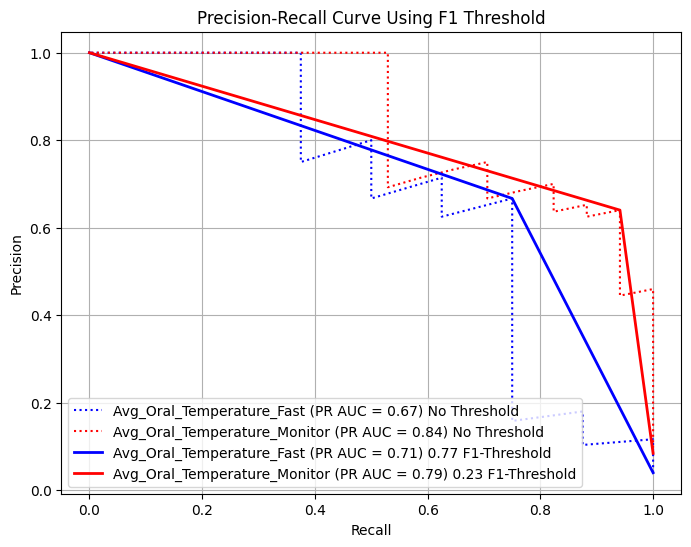

In [299]:
all_predictions = get_predictions()
true_labels = val_labels_prepared 
prediction = all_predictions[all_predictions["Model Name"] == "LogisticRegression"].iloc[0]  
model_name = prediction["Model Name"]
pred_output = prediction["Prediction Output"]
pred_prob_output = prediction["Prediction Probability"]
evaluation_lables = prediction["Evaluation Labels"]
pred_output_df = pd.DataFrame({
    'Avg_Oral_Temperature_Fast': pred_output[:, 0],
    'Avg_Oral_Temperature_Monitor': pred_output[:, 1],
})
Logistic_regression_threshold = eval_threshold(pred_prob_output, true_labels, True)


---

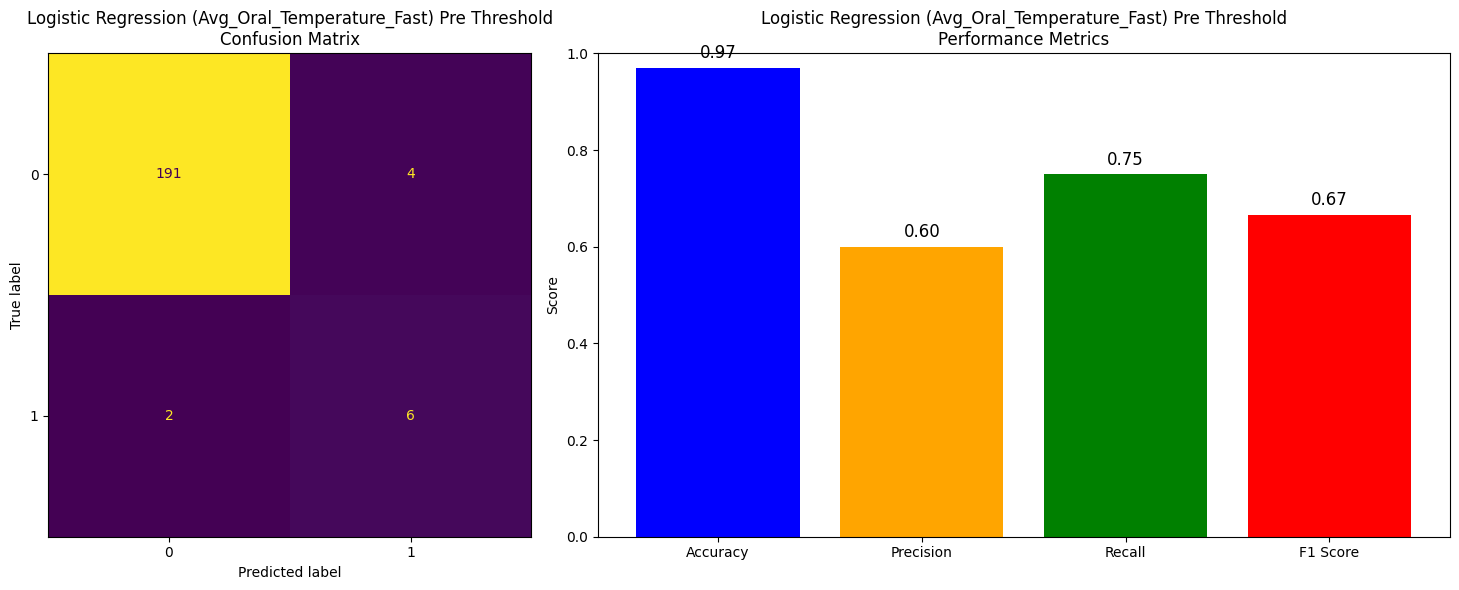

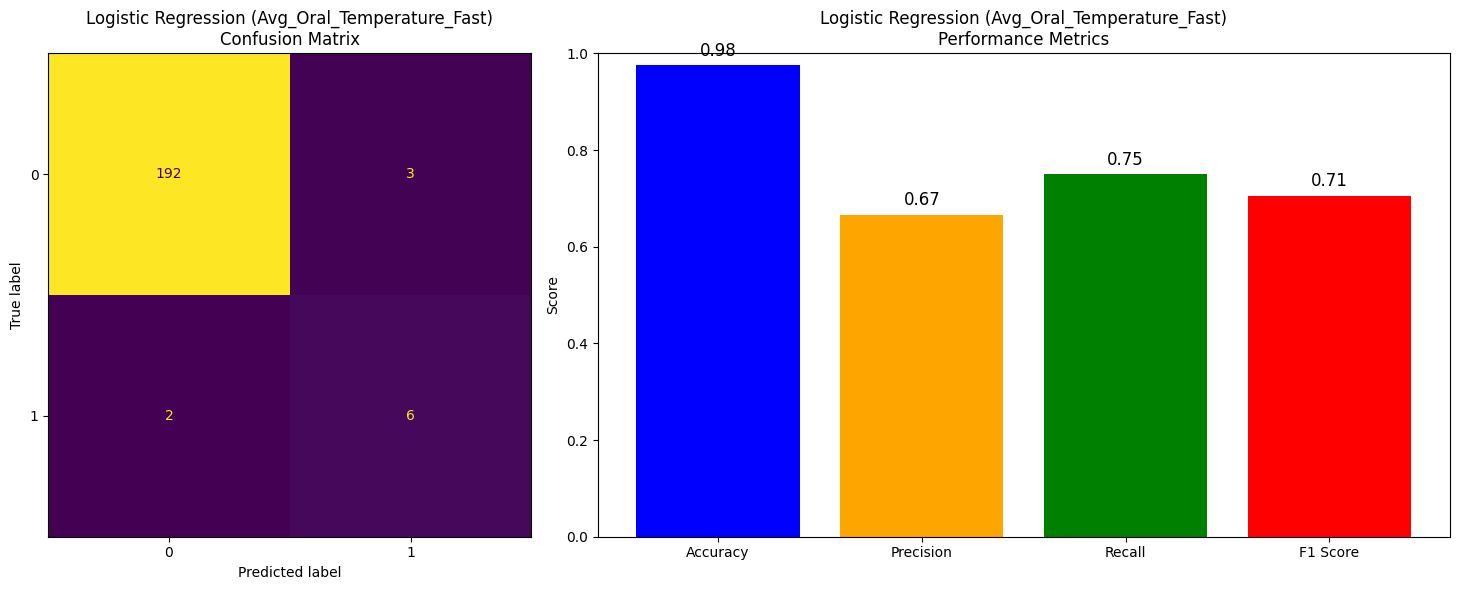

In [300]:
Logistic_regression_avg_Oral_Temperature_Fast_prethreshold = eval_classification_model(true_labels[:,0],pred_output_df['Avg_Oral_Temperature_Fast'],"Logistic Regression (Avg_Oral_Temperature_Fast) Pre Threshold")
Logistic_regression_avg_Oral_Temperature_Fast = eval_classification_model(true_labels[:,0],Logistic_regression_threshold["thresholded_predictions"]["Avg_Oral_Temperature_Fast_thresholded"], "Logistic Regression (Avg_Oral_Temperature_Fast)")

---

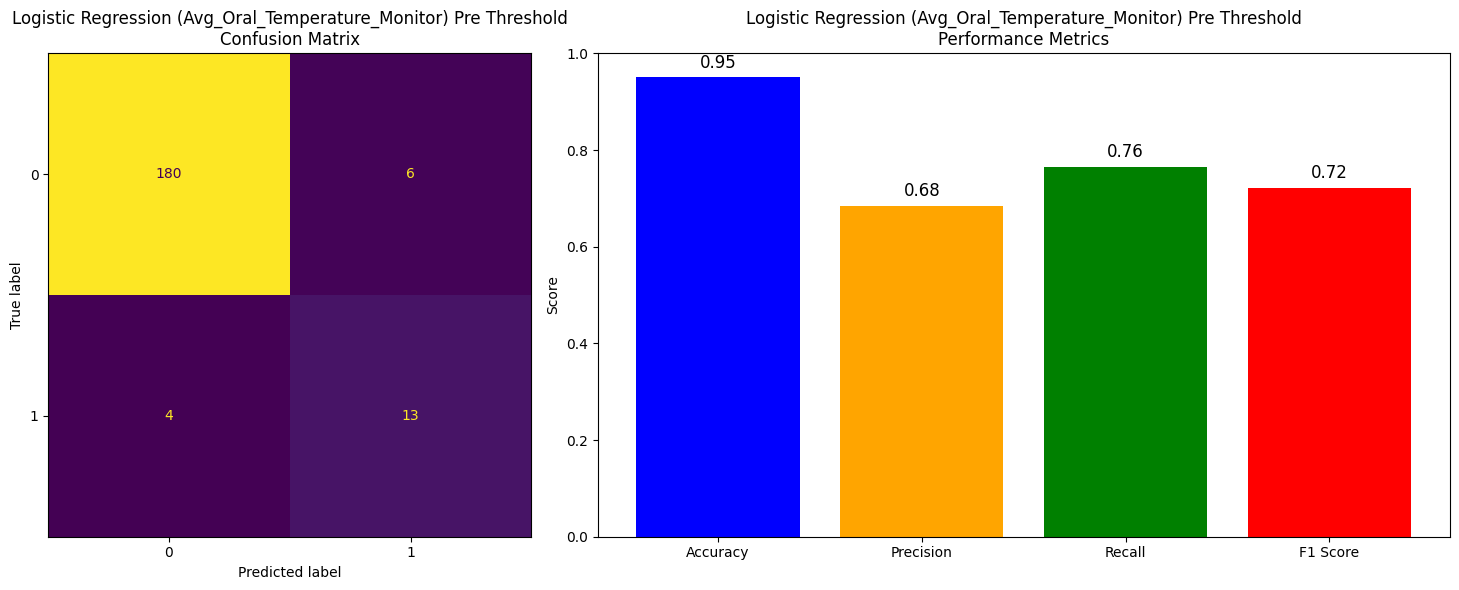

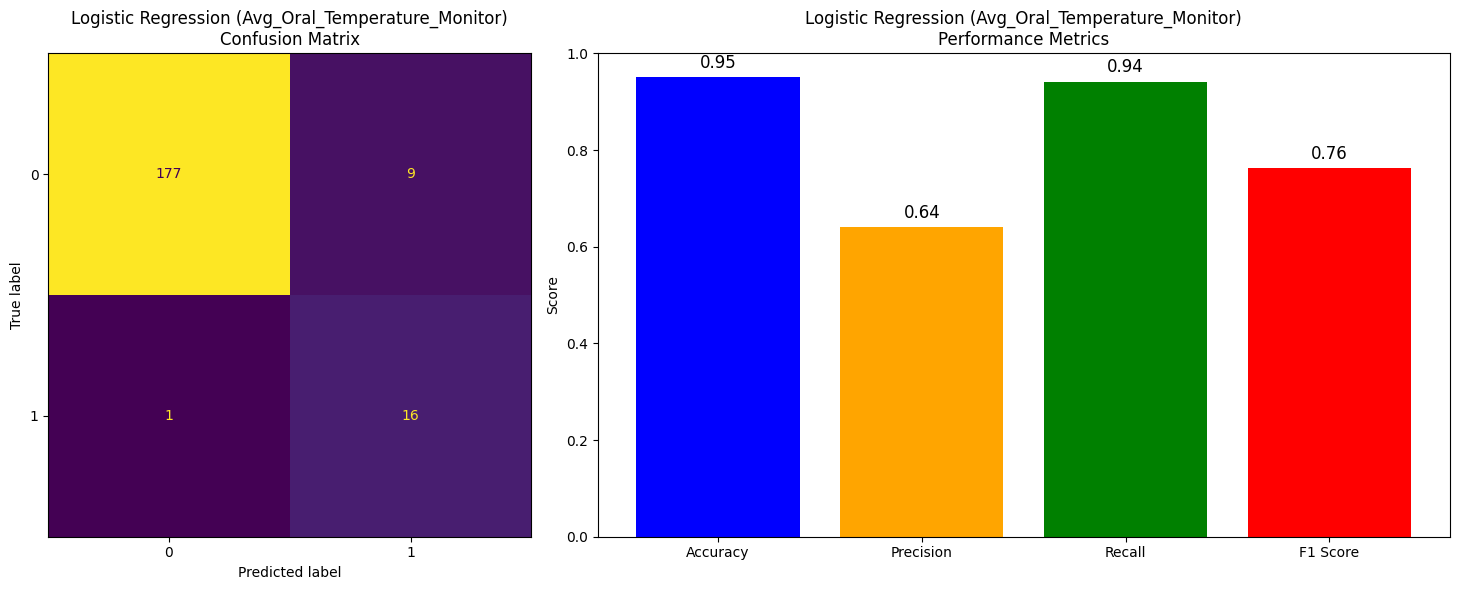

In [301]:
Logistic_regression_Avg_Oral_Temperature_Monitor_prethreshold = eval_classification_model(true_labels[:,1],pred_output_df['Avg_Oral_Temperature_Monitor'],"Logistic Regression (Avg_Oral_Temperature_Monitor) Pre Threshold")
Logistic_regression_Avg_Oral_Temperature_Monitor = eval_classification_model(true_labels[:,1],Logistic_regression_threshold["thresholded_predictions"]["Avg_Oral_Temperature_Monitor_thresholded"], "Logistic Regression (Avg_Oral_Temperature_Monitor)")

#### 3.2.1.3 Random Forest

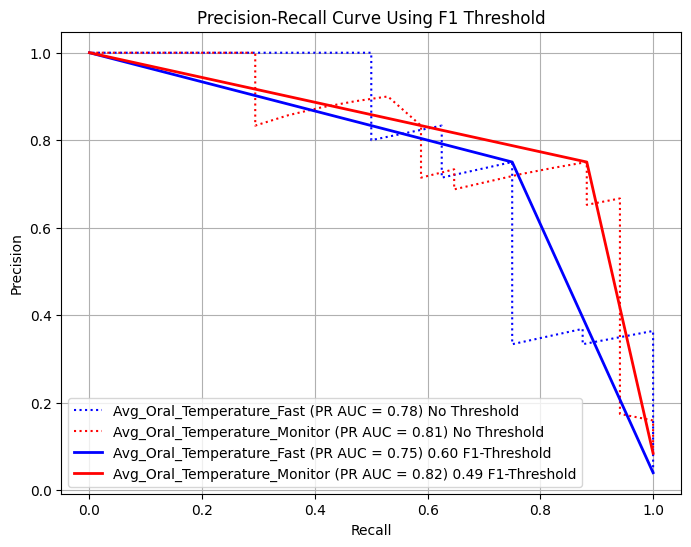

In [302]:
all_predictions = get_predictions()
true_labels = val_labels_prepared 
prediction = all_predictions[all_predictions["Model Name"] == "RandomForest"].iloc[0]  
model_name = prediction["Model Name"]
pred_output = prediction["Prediction Output"]
pred_prob_output = prediction["Prediction Probability"]
evaluation_lables = prediction["Evaluation Labels"]
pred_output_df = pd.DataFrame({
    'Avg_Oral_Temperature_Fast': pred_output[:, 0],
    'Avg_Oral_Temperature_Monitor': pred_output[:, 1]
})

Random_forest_threshold = eval_threshold(pred_prob_output, true_labels, True)


---

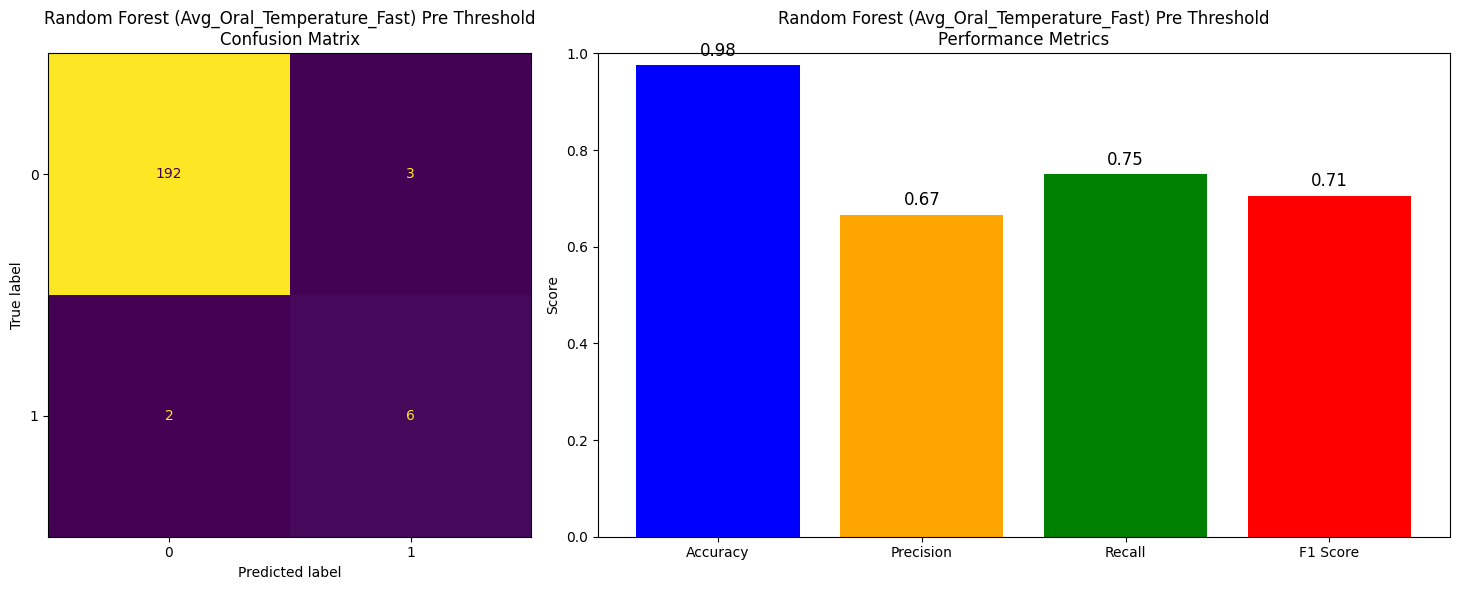

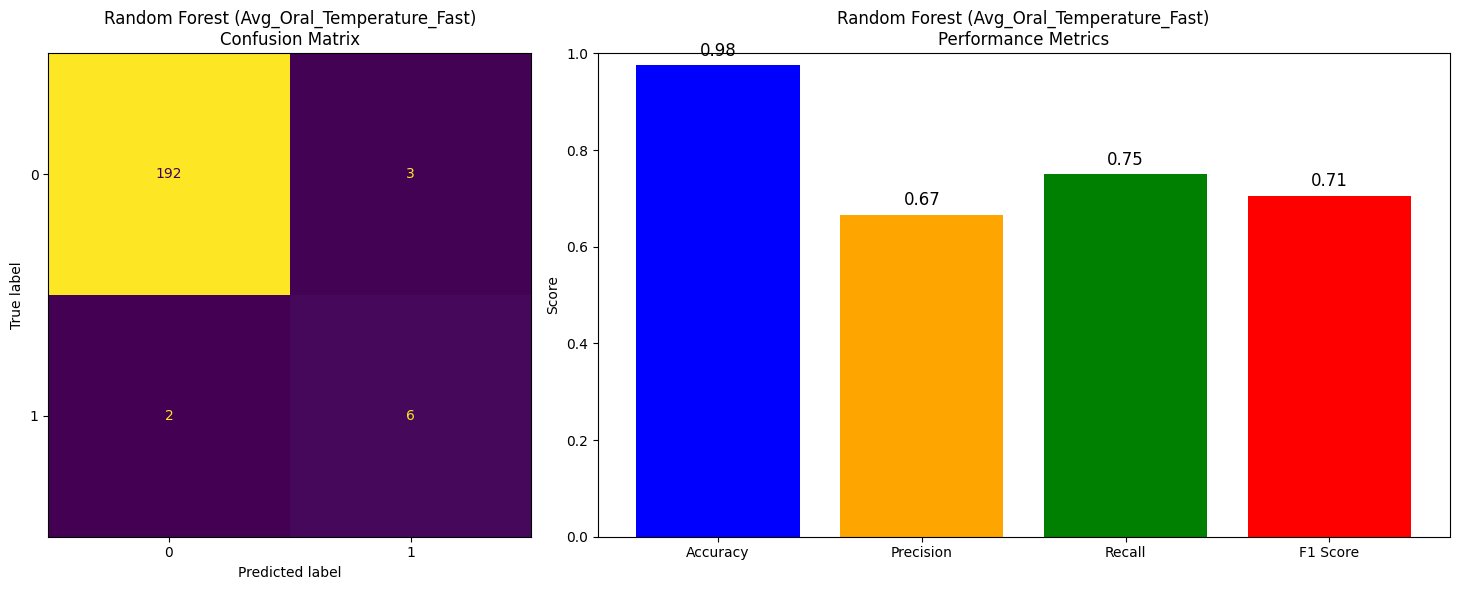

In [303]:
Random_forest_avg_Oral_Temperature_Fast_prethreshold = eval_classification_model(true_labels[:,0],pred_output_df['Avg_Oral_Temperature_Fast'],"Random Forest (Avg_Oral_Temperature_Fast) Pre Threshold")
Random_forest_avg_Oral_Temperature_Fast_Fast = eval_classification_model(true_labels[:,0],Logistic_regression_threshold["thresholded_predictions"]["Avg_Oral_Temperature_Fast_thresholded"], "Random Forest (Avg_Oral_Temperature_Fast)")

---

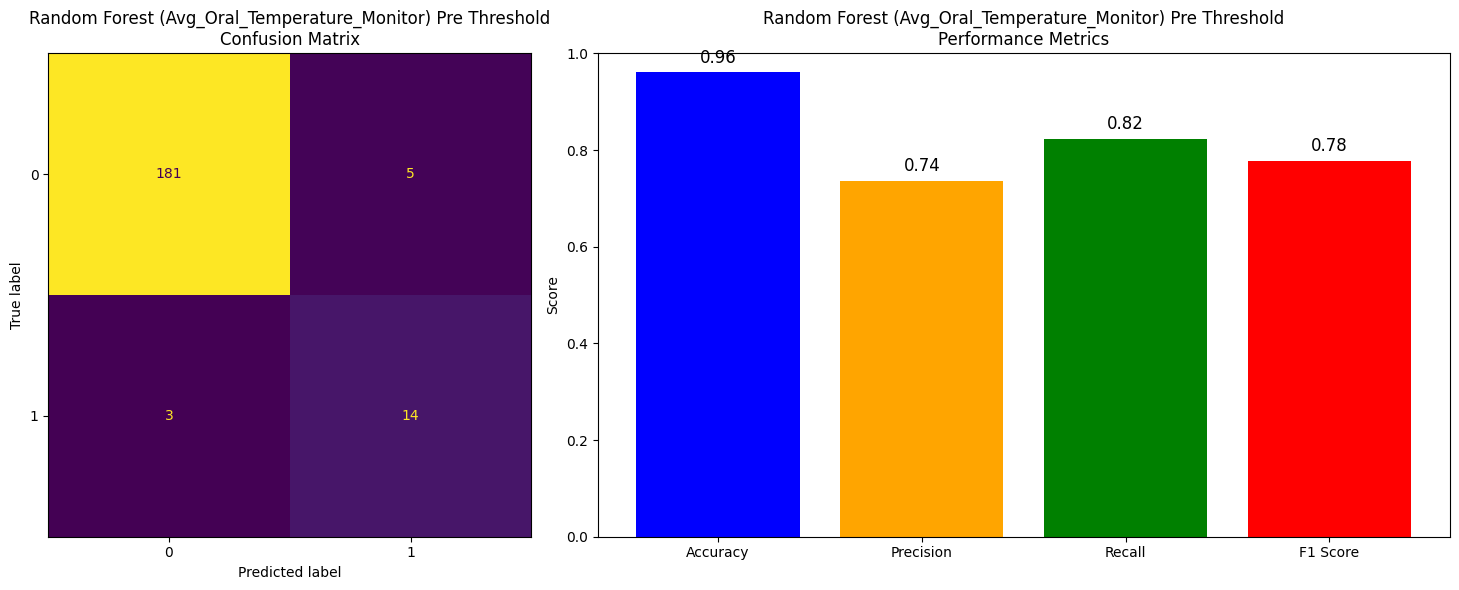

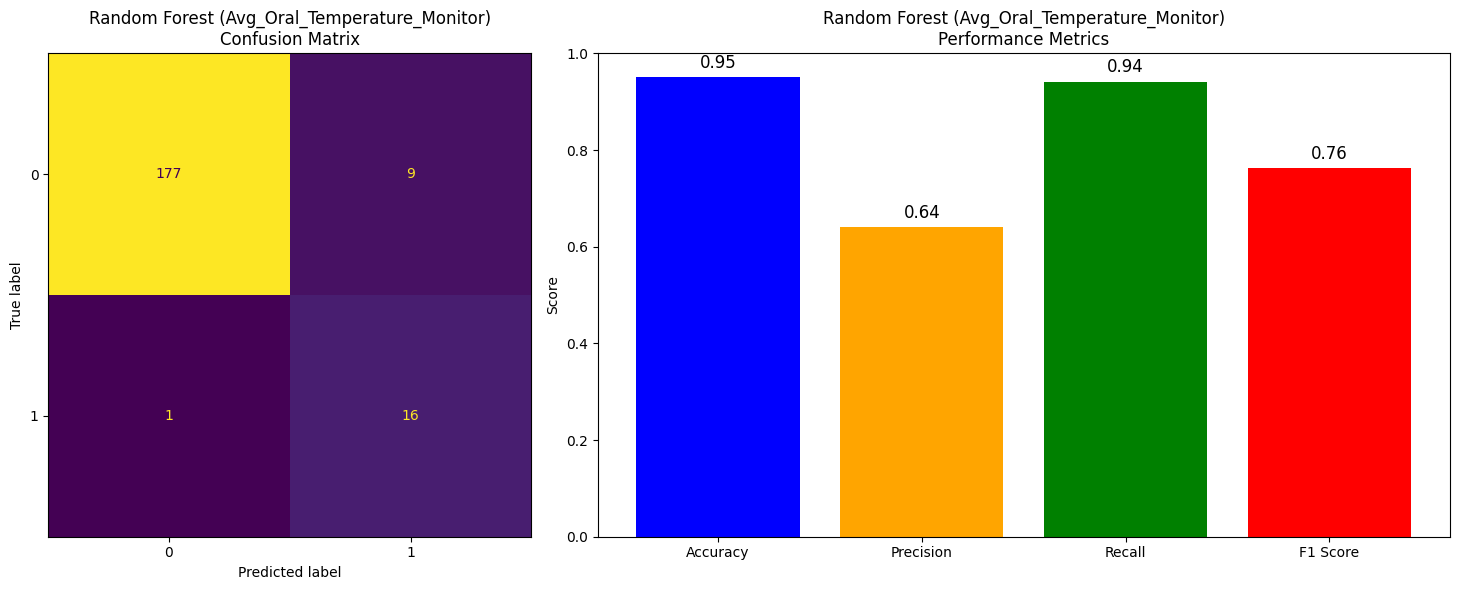

In [304]:
Random_forest_Avg_Oral_Temperature_Monitor_prethreshold = eval_classification_model(true_labels[:,1],pred_output_df['Avg_Oral_Temperature_Monitor'],"Random Forest (Avg_Oral_Temperature_Monitor) Pre Threshold")
Random_forest_Avg_Oral_Temperature_Monitor = eval_classification_model(true_labels[:,1],Logistic_regression_threshold["thresholded_predictions"]["Avg_Oral_Temperature_Monitor_thresholded"], "Random Forest (Avg_Oral_Temperature_Monitor)")

#### 3.2.1.4 Gradient Boosting Classifier

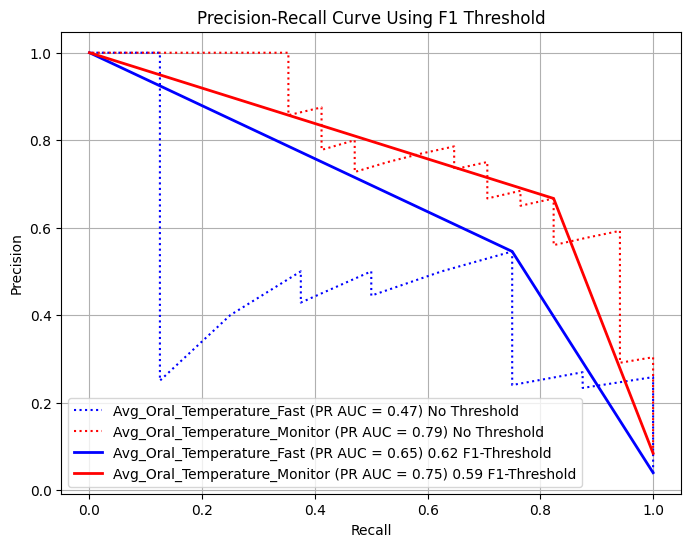

In [305]:
model_name_str = "GradientBoosting"
all_predictions = get_predictions()
true_labels = val_labels_prepared 
prediction = all_predictions[all_predictions["Model Name"] == model_name_str].iloc[0]  
model_name = prediction["Model Name"]
pred_output = prediction["Prediction Output"]
pred_prob_output = prediction["Prediction Probability"]
evaluation_lables = prediction["Evaluation Labels"]
pred_output_df = pd.DataFrame({
    'Avg_Oral_Temperature_Fast': pred_output[:, 0],
    'Avg_Oral_Temperature_Monitor': pred_output[:, 1]
})

grad_boosting_threshold = eval_threshold(pred_prob_output, true_labels, True)


---

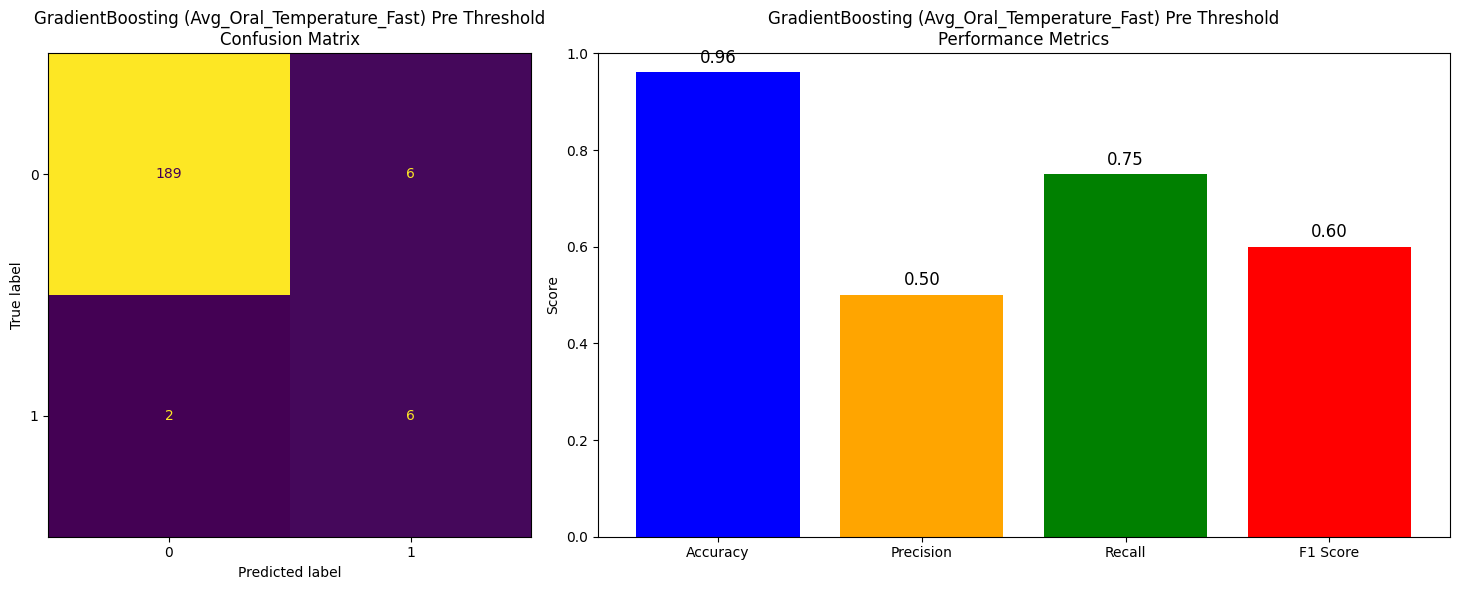

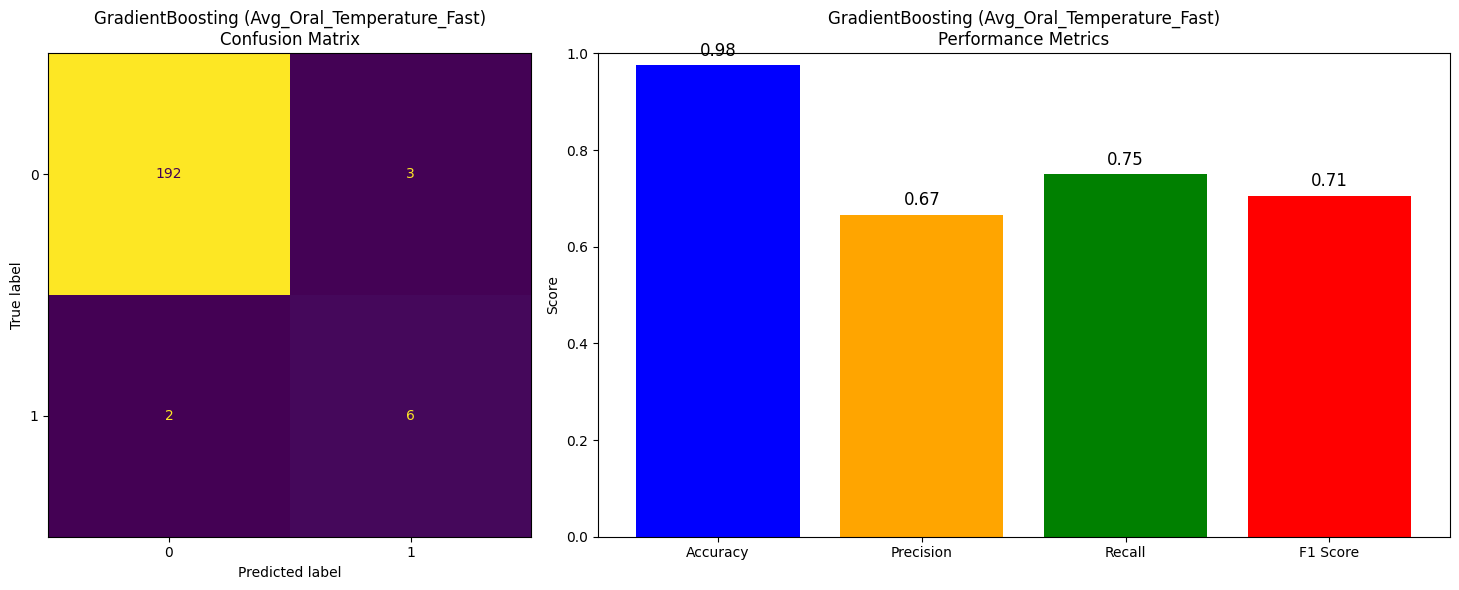

In [306]:
Grad_boosting_avg_Oral_Temperature_Fast_prethreshold = eval_classification_model(true_labels[:,0],pred_output_df['Avg_Oral_Temperature_Fast'],f"{model_name_str} (Avg_Oral_Temperature_Fast) Pre Threshold")
Grad_boosting_avg_Oral_Temperature_Fast_Fast = eval_classification_model(true_labels[:,0],Logistic_regression_threshold["thresholded_predictions"]["Avg_Oral_Temperature_Fast_thresholded"], f"{model_name_str} (Avg_Oral_Temperature_Fast)")

---

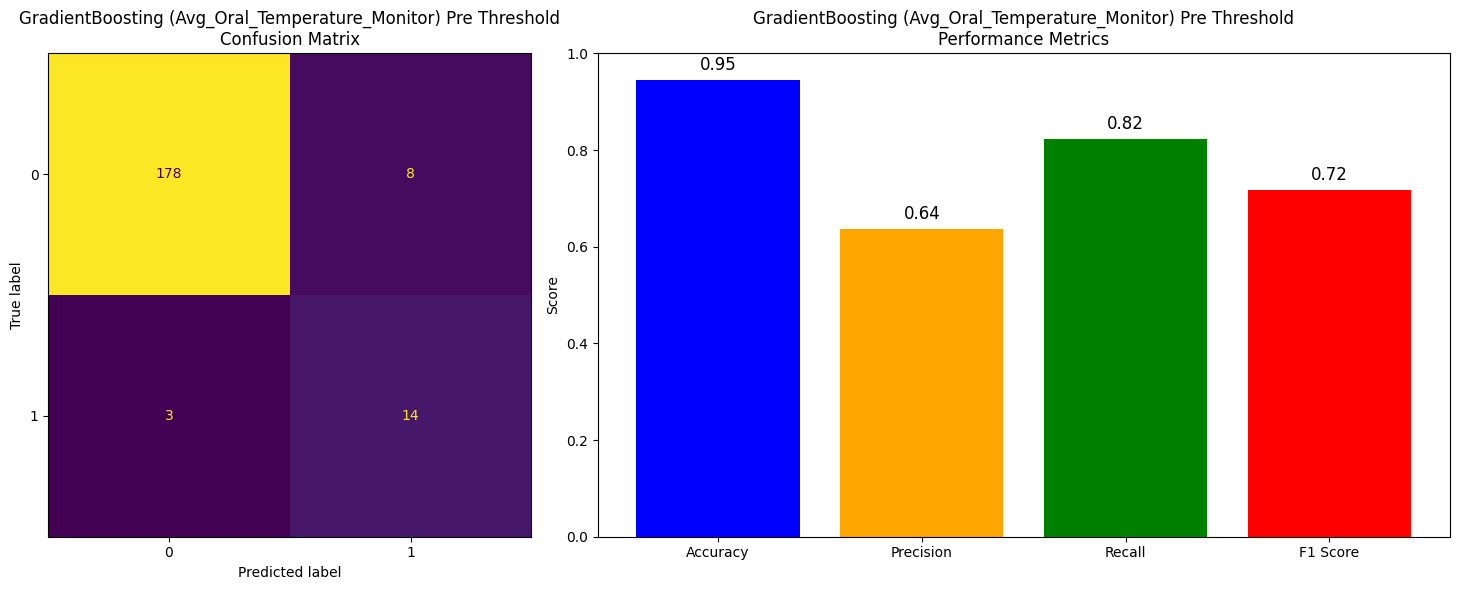

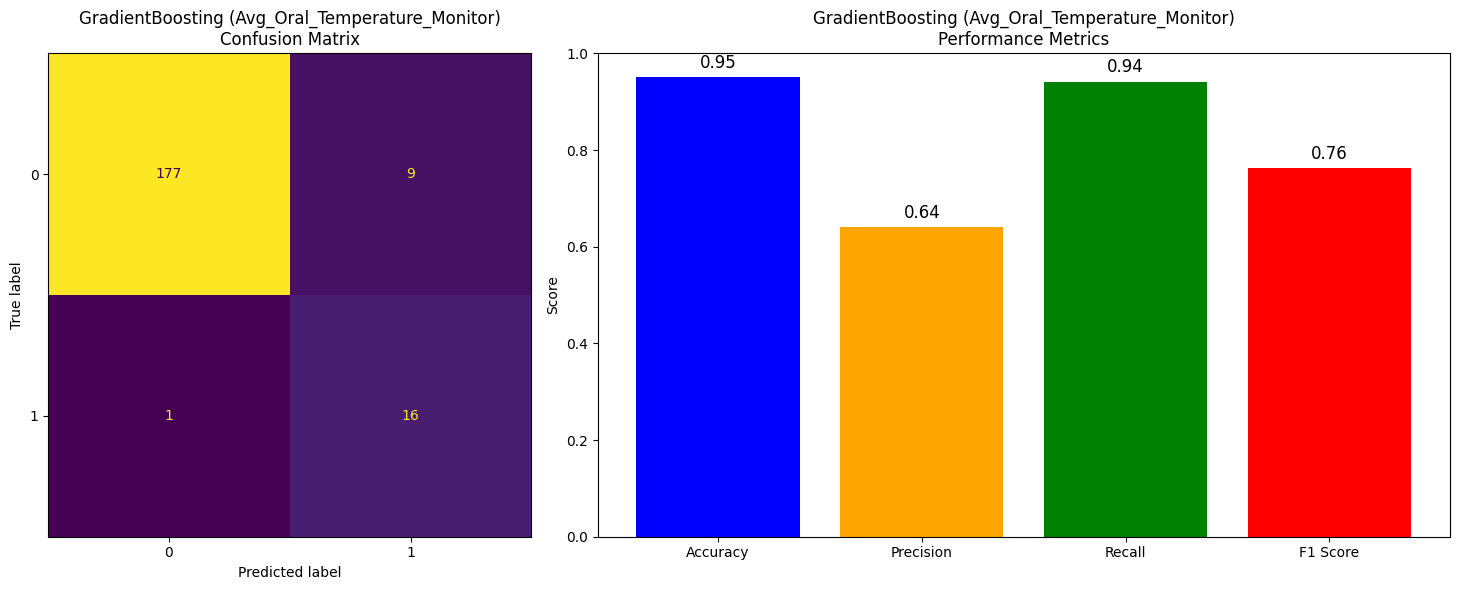

In [307]:
Grad_boosting_Avg_Oral_Temperature_Monitor_prethreshold = eval_classification_model(true_labels[:,1],pred_output_df['Avg_Oral_Temperature_Monitor'],f"{model_name_str} (Avg_Oral_Temperature_Monitor) Pre Threshold")
Grad_boosting_Avg_Oral_Temperature_Monitor = eval_classification_model(true_labels[:,1],Logistic_regression_threshold["thresholded_predictions"]["Avg_Oral_Temperature_Monitor_thresholded"], f"{model_name_str} (Avg_Oral_Temperature_Monitor)")

#### 3.2.1.6 SVC

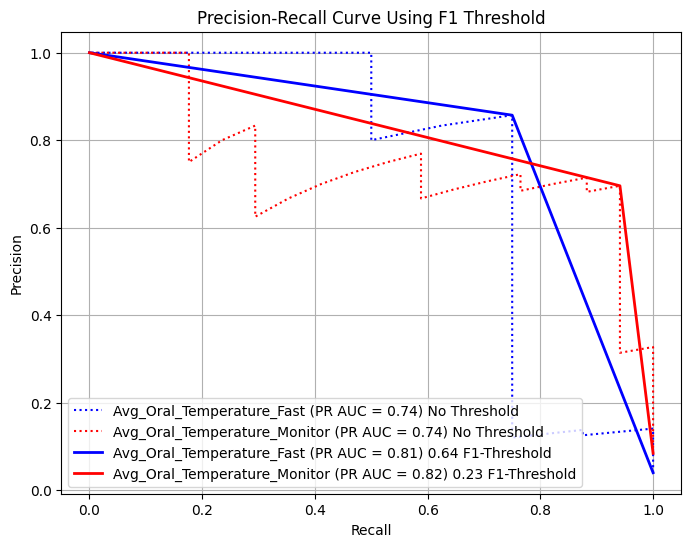

In [308]:
model_name_str = "SVC"
all_predictions = get_predictions()
true_labels = val_labels_prepared 
prediction = all_predictions[all_predictions["Model Name"] == model_name_str].iloc[0]  
model_name = prediction["Model Name"]
pred_output = prediction["Prediction Output"]
pred_prob_output = prediction["Prediction Probability"]
evaluation_lables = prediction["Evaluation Labels"]
pred_output_df = pd.DataFrame({
    'Avg_Oral_Temperature_Fast': pred_output[:, 0],
    'Avg_Oral_Temperature_Monitor': pred_output[:, 1]
})

svc_threshold = eval_threshold(pred_prob_output, true_labels, True)


---

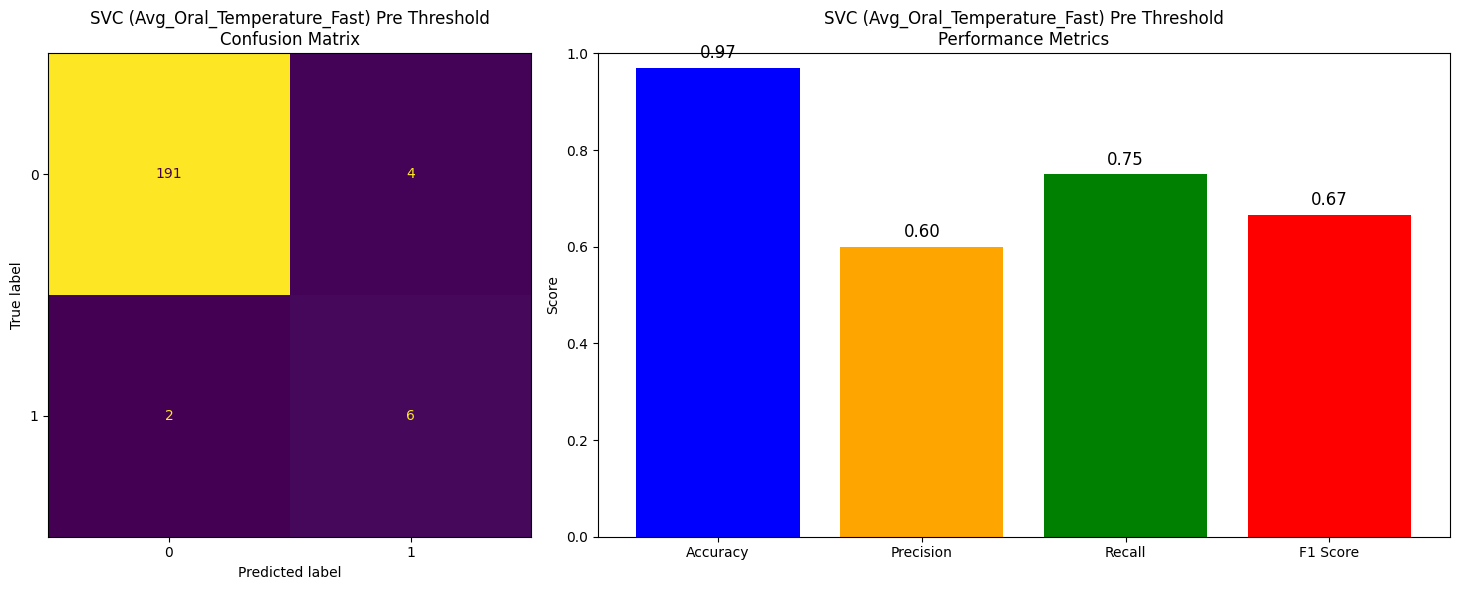

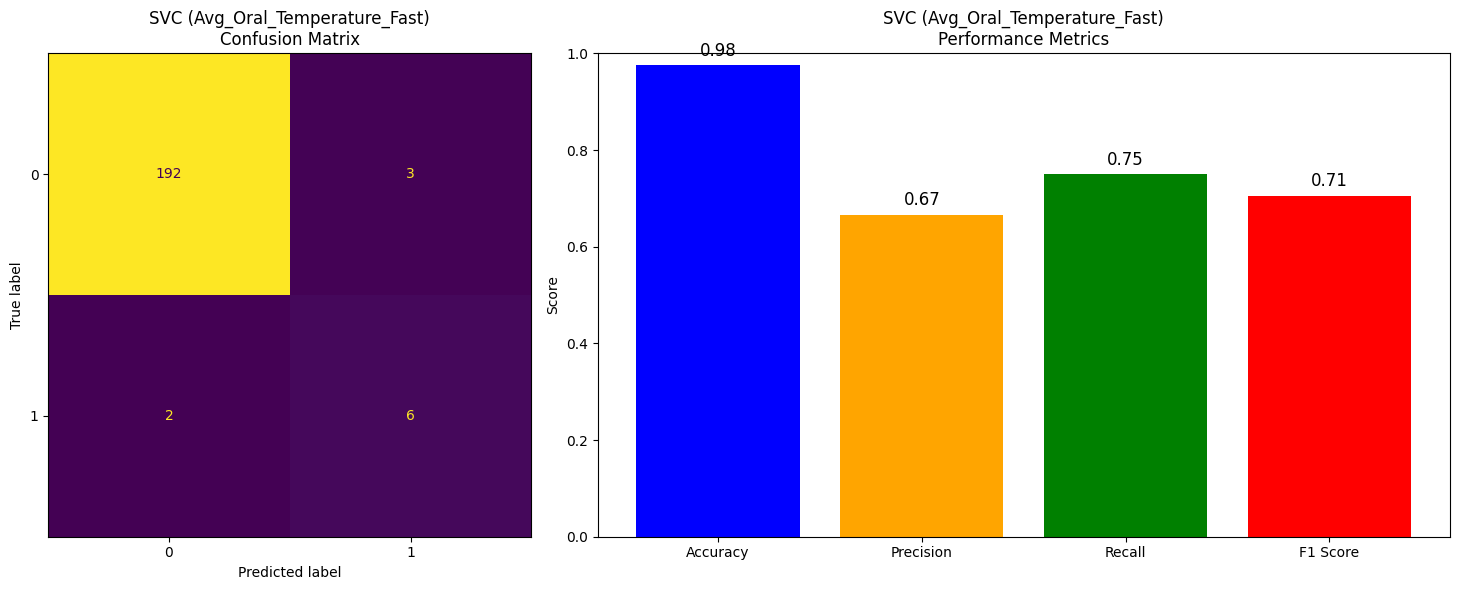

In [309]:
svc_avg_Oral_Temperature_Fast_prethreshold = eval_classification_model(true_labels[:,0],pred_output_df['Avg_Oral_Temperature_Fast'],f"{model_name_str} (Avg_Oral_Temperature_Fast) Pre Threshold")
svc_avg_Oral_Temperature_Fast_Fast = eval_classification_model(true_labels[:,0],Logistic_regression_threshold["thresholded_predictions"]["Avg_Oral_Temperature_Fast_thresholded"], f"{model_name_str} (Avg_Oral_Temperature_Fast)")

---

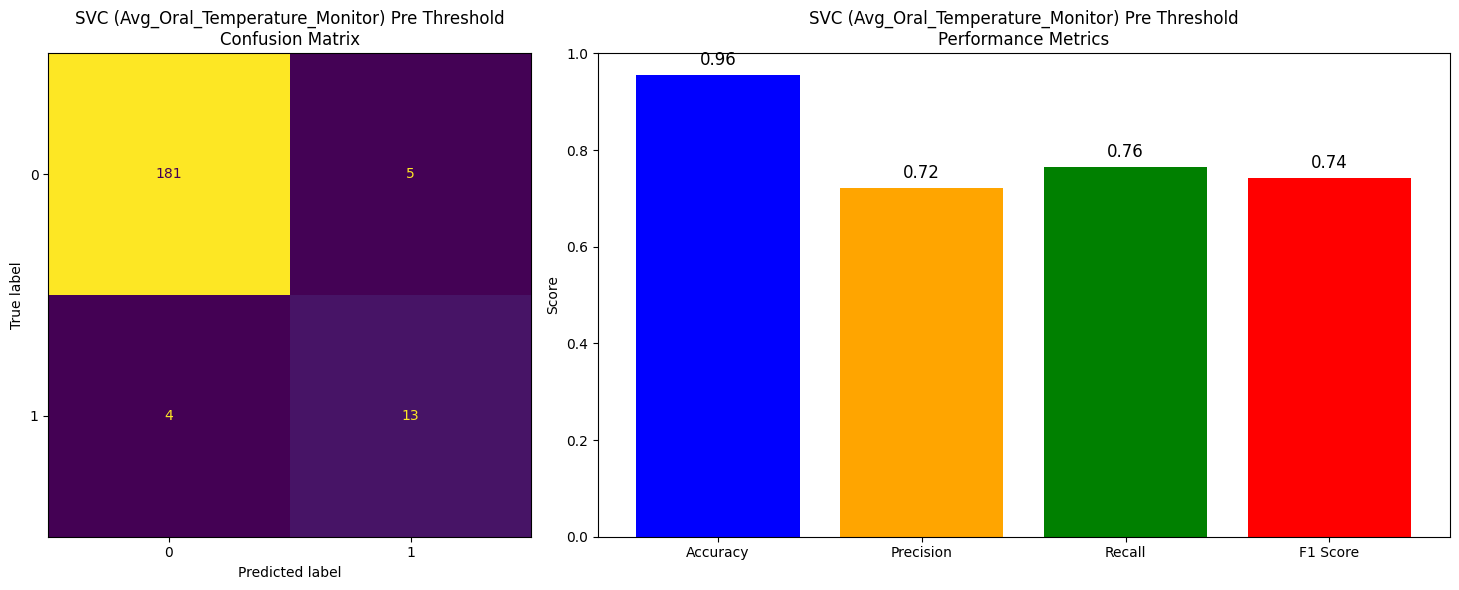

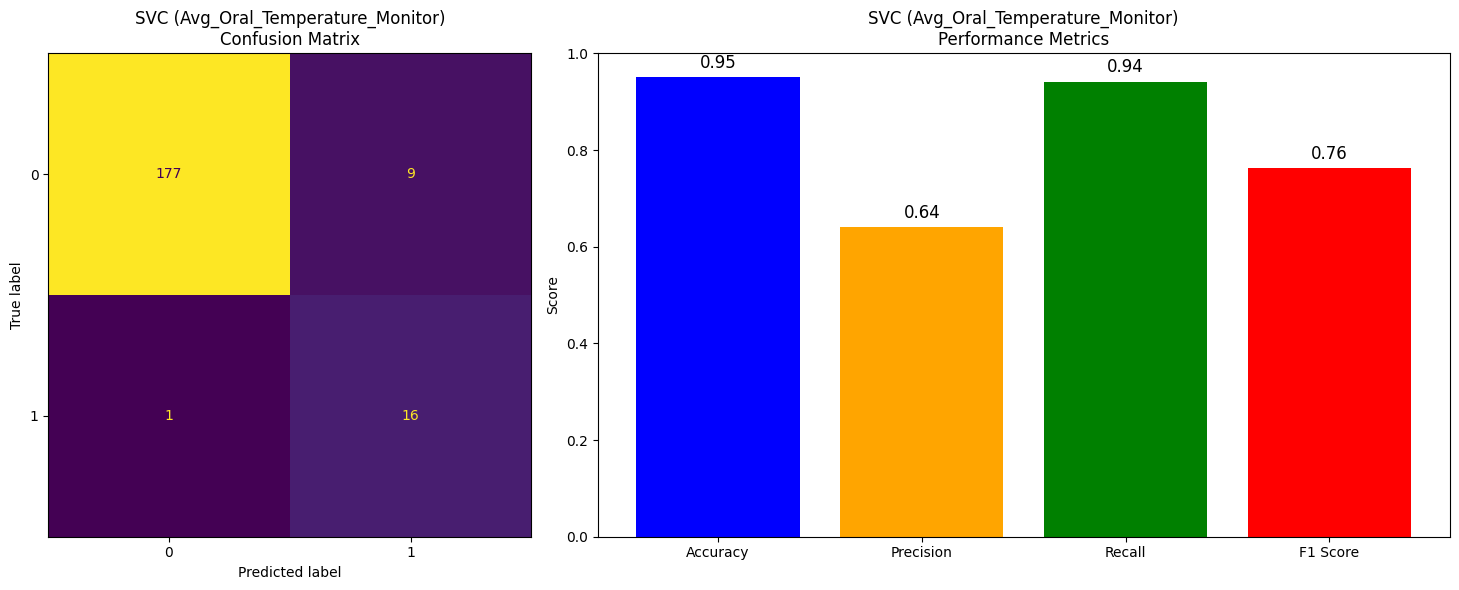

In [310]:
svc_Avg_Oral_Temperature_Monitor_prethreshold = eval_classification_model(true_labels[:,1],pred_output_df['Avg_Oral_Temperature_Monitor'],f"{model_name_str} (Avg_Oral_Temperature_Monitor) Pre Threshold")
svc_Oral_Temperature_Monitor = eval_classification_model(true_labels[:,1],Logistic_regression_threshold["thresholded_predictions"]["Avg_Oral_Temperature_Monitor_thresholded"], f"{model_name_str} (Avg_Oral_Temperature_Monitor)")

In [311]:
display(eval_classification_models)

{'Logistic Regression (Avg_Oral_Temperature_Fast) Pre Threshold': {'confusion_matrix': array([[191,   4],
         [  2,   6]]),
  'accuracy': 0.9704433497536946,
  'precision': 0.6,
  'recall': 0.75,
  'f1': 0.6666666666666666},
 'Logistic Regression (Avg_Oral_Temperature_Fast)': {'confusion_matrix': array([[192,   3],
         [  2,   6]]),
  'accuracy': 0.9753694581280788,
  'precision': 0.6666666666666666,
  'recall': 0.75,
  'f1': 0.7058823529411765},
 'Logistic Regression (Avg_Oral_Temperature_Monitor) Pre Threshold': {'confusion_matrix': array([[180,   6],
         [  4,  13]]),
  'accuracy': 0.9507389162561576,
  'precision': 0.6842105263157895,
  'recall': 0.7647058823529411,
  'f1': 0.7222222222222222},
 'Logistic Regression (Avg_Oral_Temperature_Monitor)': {'confusion_matrix': array([[177,   9],
         [  1,  16]]),
  'accuracy': 0.9507389162561576,
  'precision': 0.64,
  'recall': 0.9411764705882353,
  'f1': 0.7619047619047619},
 'Random Forest (Avg_Oral_Temperature_Fast)

### 3.2.1 Evaluation of Linear regression models